In [1]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 42.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 56.1 MB/s eta 0:00:00


In [3]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import math
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/preprocessed_sa_2021_2022.xlsx")

In [6]:
#Showing the features present
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31060 entries, 0 to 31059
Data columns (total 107 columns):
 #    Column         Non-Null Count  Dtype
---   ------         --------------  -----
 0    _STATE         31060 non-null  int64
 1    FMONTH         31060 non-null  int64
 2    IDATE          31060 non-null  int64
 3    IMONTH         31060 non-null  int64
 4    IDAY           31060 non-null  int64
 5    IYEAR          31060 non-null  int64
 6    SEXVAR         31060 non-null  int64
 7    GENHLTH        31060 non-null  int64
 8    PHYSHLTH       31060 non-null  int64
 9    MENTHLTH       31060 non-null  int64
 10   PRIMINSR       31060 non-null  int64
 11   PERSDOC3       31060 non-null  int64
 12   MEDCOST1       31060 non-null  int64
 13   CHECKUP1       31060 non-null  int64
 14   EXERANY2       31060 non-null  int64
 15   CVDINFR4       31060 non-null  int64
 16   CVDCRHD4       31060 non-null  int64
 17   CVDSTRK3       31060 non-null  int64
 18   ASTHMA3        31060 non

In [7]:
df.shape

(31060, 107)

### 1. Exploratory Data Analysis

In [8]:
df.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH5,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,USENOW3,ECIGNOW1,ALCDAY5,FLUSHOT7,PNEUVAC4,HIVTST7,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,MARIJAN1,_METSTAT,_URBSTAT,_IMPRACE,_DUALUSE,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_LTASTH1,_CASTHM1,_ASTHMS1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_AIDTST4,MARIJ_ABUSER,ECIG_ABUSER,TOBA_ABUSER,ALCO_ABUSER,LEVEL_ABUSER,TARGET_ABUSER
count,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000,31060.000
mean,39.891,6.498,6925881.589,6.768,15.606,2021.640,1.539,2.553,60.479,59.555,8.166,1.574,1.948,1.446,1.237,1.968,1.989,1.969,1.870,1.926,1.899,1.940,1.827,1.976,2.750,1.655,2.300,5.103,1.348,1.429,1.872,3.952,69.255,22.369,697.866,702.124,1.914,1.965,1.928,1.861,1.969,1.946,1.617,2.952,2.222,496.075,1.491,1.982,1.986,1.975,1.882,2.040,2.057,1.973,1.516,1.638,1.896,1.430,1.371,1.312,4.611,4.818,79.723,1.368,1.154,1.462,5.462,1.185,1.638,1.628,1.253,4.567,1.240,1.176,1.172,2.809,4.817,4.880,2.013,1.825,1.349,1.581,1.588,1.539,8.189,1.443,57.200,4.583,2.158,1.466,3.123,5.371,3.420,1.158,1.044,1.447,18.632,1.189,904.732,1.114,2.096,0.056,0.020,0.018,0.118,0.211,0.189
std,6.988,3.211,3341631.119,3.344,8.436,0.517,0.498,1.052,37.225,37.702,21.024,0.875,0.364,1.095,0.479,0.442,0.558,0.346,0.474,0.493,0.480,0.440,0.568,0.397,0.738,0.616,1.730,0.974,0.824,1.512,0.460,2.894,35.621,32.608,2121.580,1252.720,0.443,0.343,0.554,0.498,0.263,0.393,0.626,0.285,1.206,353.965,0.727,1.559,1.311,1.130,1.075,1.016,0.951,1.263,1.434,1.428,1.521,1.420,1.389,1.366,1.116,0.884,23.243,0.482,0.361,1.220,3.828,0.510,1.253,1.200,1.302,3.946,0.510,0.585,0.798,0.853,17.910,17.906,0.714,2.112,1.251,1.548,1.633,0.498,3.570,0.528,17.379,1.558,1.833,1.094,0.957,2.215,0.984,0.656,0.205,0.497,29.229,0.725,7732.147,0.661,1.741,0.229,0.138,0.132,0.323,0.462,0.391
min,32.000,1.000,1012022.000,1.000,1.000,2021.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,53.000,400.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,101.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,18.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.00

In [9]:
# Single feature plots - Univariate Analysis
plt.figure(figsize=(30, 400))
plt.subplots_adjust(hspace=0.5)

# Use a for loop to create count plots for each column
for i, column in enumerate(df.columns, 1):

    # add a new subplot iteratively
    ax = plt.subplot(40, 3, i)
    bx = sns.countplot(x=column, data=df, ax=ax)


    # Add count values on top of the bars
    for p in bx.patches:
                bx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points')
# Show the plots
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Double features plots - Bivariate Analysis
plt.figure(figsize=(30, 404))
plt.subplots_adjust(hspace=0.5)

# Use a for loop to create count plots for each column
for i, column in enumerate(df.columns, 1):

    # add a new subplot iteratively
    ax = plt.subplot(40, 3, i)
    bx = sns.countplot(x=column, hue='TARGET_ABUSER', data=df, ax=ax)


    # Add count values on top of the bars
    for p in bx.patches:
                bx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points')
# Show the plots
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-11-fab357ddba7f>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[row_idx][col_idx])
<ipython-input-11-fab357ddba7f>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[row_idx][col_idx])
<ipython-input-11-fab357ddba7f>:24: UserWarning: 

`di

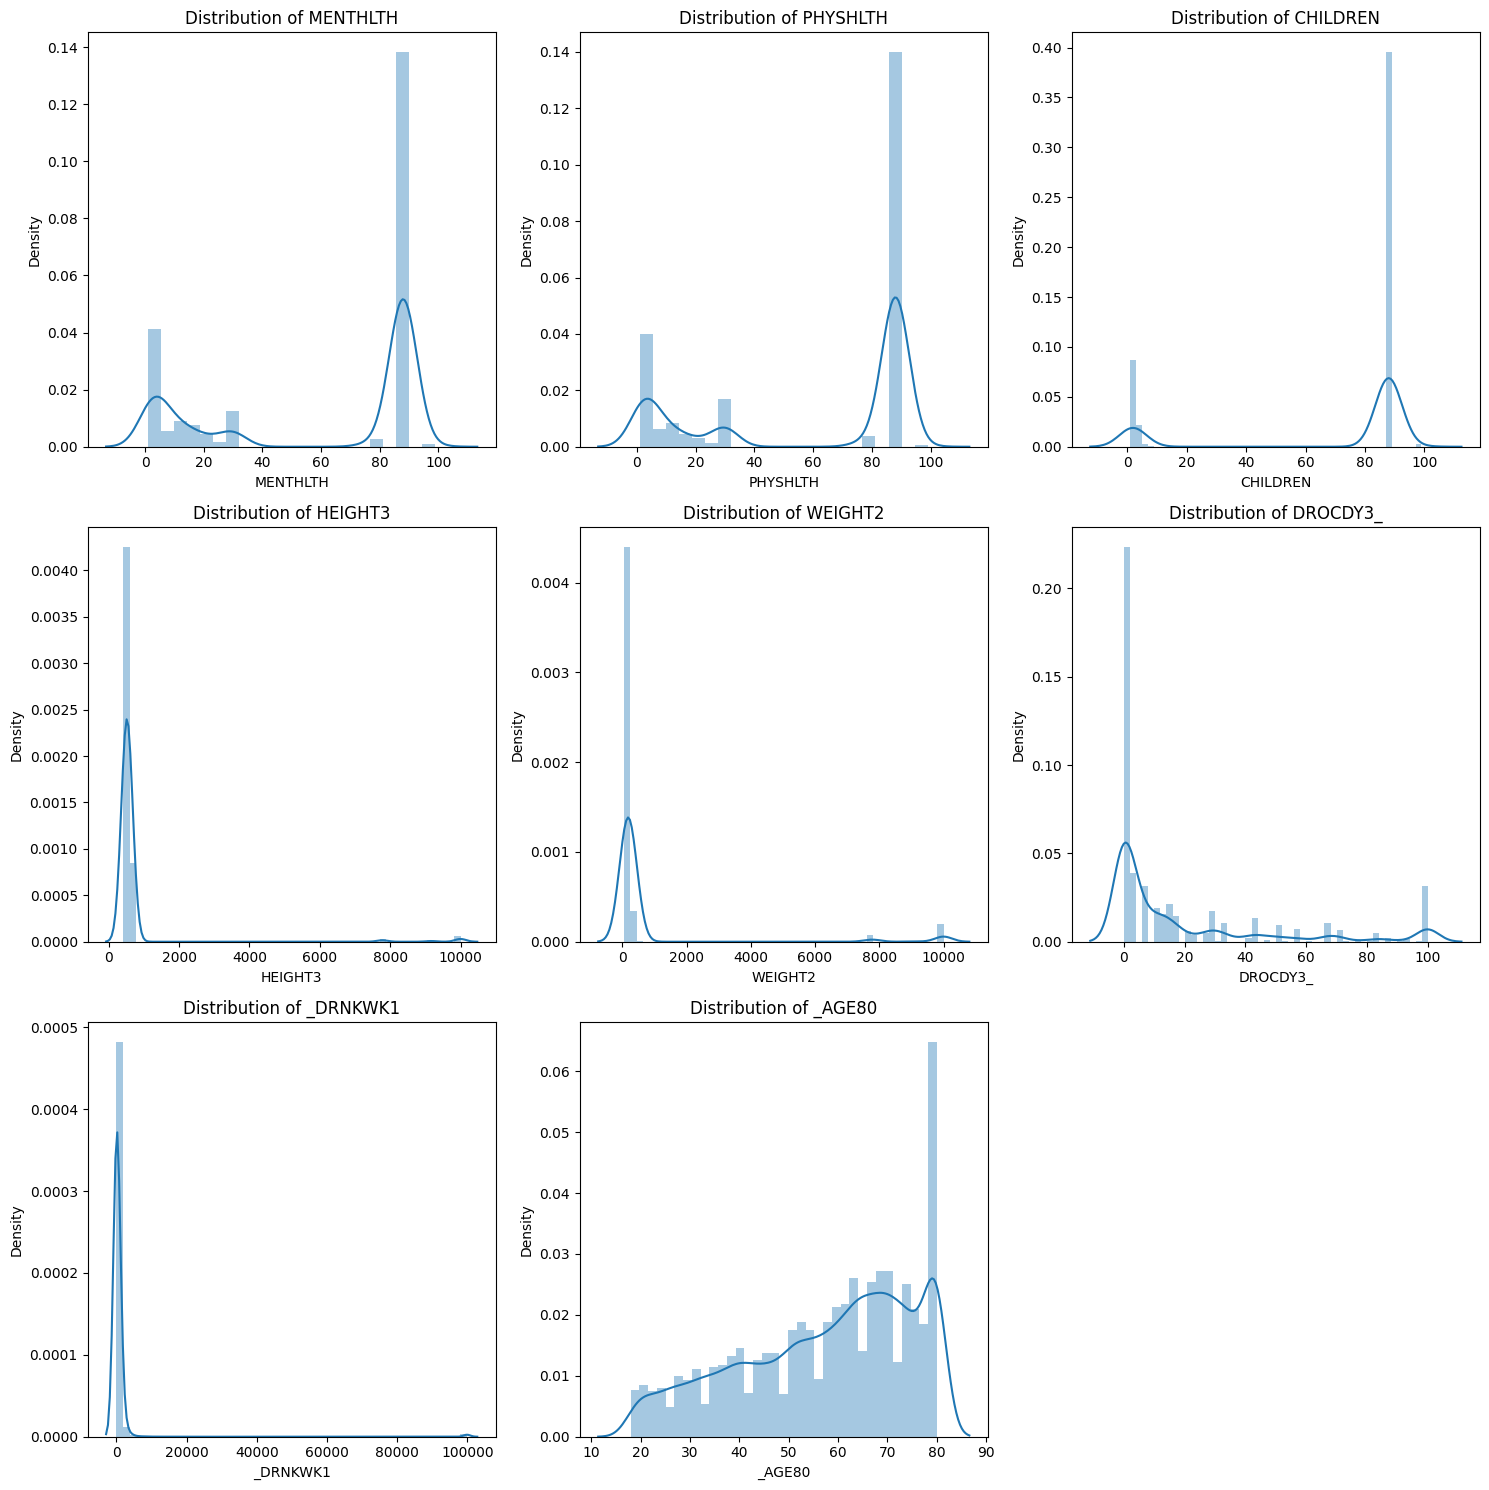

In [11]:
# Distribution plots
distrib = ['MENTHLTH','PHYSHLTH','CHILDREN','HEIGHT3','WEIGHT2','DROCDY3_','_DRNKWK1','_AGE80']

# Get the number of columns
num_cols = len(distrib)

# Define the number of columns per row in the subplot grid
cols_per_row = 3

# Calculate the number of rows needed
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5*num_rows))

# Flatten the axes array if necessary
if num_rows == 1:
    axes = [axes]

# Iterate over each column in the DataFrame and plot
for i, column in enumerate(distrib):
    row_idx = i // cols_per_row
    col_idx = i % cols_per_row
    sns.distplot(df[column], ax=axes[row_idx][col_idx])
    axes[row_idx][col_idx].set_title(f'Distribution of {column}')
    axes[row_idx][col_idx].set_xlabel(column)
    axes[row_idx][col_idx].set_ylabel('Density')

# Remove any empty subplots
for i in range(num_cols, num_rows * cols_per_row):
    row_idx = i // cols_per_row
    col_idx = i % cols_per_row
    fig.delaxes(axes[row_idx][col_idx])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Trying out the automatic EDA tools

1. DataPrep

In [12]:
from dataprep.eda import create_report
report = create_report(df)

Computing mean_agg-aggregate-mean_chunk-sub-sum-sum-aggregate-truediv-fb12011dcd59fe144ddf0dc6d79fc760:   0%|          | 28/11876 [00:03<12:59, 15.19it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [13]:
report

Output hidden; open in https://colab.research.google.com to view.

In [14]:
report.save('/content/drive/MyDrive/Capstone_Project/Backup/DataPrep_EDA_Report')

Report has been saved to /content/drive/MyDrive/Capstone_Project/Backup/DataPrep_EDA_Report.html!


2. SweetViz

In [15]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df,target_feat='TARGET_ABUSER')

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

In [16]:
#displaying the report
advert_report.show_notebook()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
#saving the report
advert_report.show_html('/content/drive/MyDrive/Capstone_Project/Backup/Sweetviz_EDA_Report.html')

Report /content/drive/MyDrive/Capstone_Project/Backup/Sweetviz_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
df_nonabuser = df[df['TARGET_ABUSER'] == 0]
df_abuser = df[df['TARGET_ABUSER'] == 1]

In [19]:
df_abuser = df_abuser.drop(columns=['LEVEL_ABUSER', 'TARGET_ABUSER'])
df_nonabuser = df_nonabuser.drop(columns=['LEVEL_ABUSER', 'TARGET_ABUSER'])

In [20]:
#Comparing two datasets (Non abusers & Abusers)
report_comp = sv.compare(df_nonabuser, df_abuser)

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

In [21]:
report_comp.show_notebook()

Output hidden; open in https://colab.research.google.com to view.

In [22]:
report_comp.show_html('/content/drive/MyDrive/Capstone_Project/Backup/Sweetviz_EDA_Compare.html')

Report /content/drive/MyDrive/Capstone_Project/Backup/Sweetviz_EDA_Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


We can see a few points from the EDA: \\
1. Some columns need to be dropped because they are highly correlated or have similar distributions.
2. Distribution of the a few features are skewed, that is they have outliers and need to be corrected.
3. Structure and description of the dataset telling which algorithms might be appropriate to use, how much continuous and categorical data is there.
4. Class imbalance that needs handling.
5. Cross checking data missingness.
6. The variables used to calculate the TARGET variable are present in the dataset, they must be dropped to achieve a better result.
7. Some fields have unwanted values like 7,9 which needs replacement
8. Some interesting patterns of abuse especially co-occuring use, mental health and substance abuse

In [23]:
# Creating a deep copies of the main DataFrame
dfcopy = df.copy(deep=True)

In [24]:
feat = ['_AIDTST4','_EDUCAG','_INCOMG1','_CHLDCNT','_AGEG5YR','_AGE65YR','_SEX','_RACE','_HLTHPLN','_PHYS14D','_MENT14D','_TOTINDA','_METSTAT','_URBSTAT',
        'EMPLOY1','_SMOKER3','_CURECI1','_RFBING5','VETERAN3','RENTHOM1','MARITAL','DIABETE4','HAVARTH5','ASTHMA3','_STATE','CVDINFR4','ADDEPEV3']

disabilities = ['DEAF','BLIND','DECIDE','DIFFWALK','DIFFDRES','DIFFALON']

ace = ['ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC','ACEPUNCH','ACEHURT1','ACESWEAR','ACETOUCH','ACETTHEM','ACEHVSEX','ACEADSAF','ACEADNED']

target = ['TARGET_ABUSER','LEVEL_ABUSER','ALCO_ABUSER','TOBA_ABUSER','ECIG_ABUSER','MARIJ_ABUSER']

### Understanding Co-morbidities of Substance Abuse

1. EDA for co-occuring substance abuse


In [25]:
#defining conditions
conditions2 = [
    (df['ALCO_ABUSER'] == 1) & (df['ECIG_ABUSER'] == 1) & (df['MARIJ_ABUSER'] == 1) & (df['TOBA_ABUSER'] == 1),
    (df['ALCO_ABUSER'] == 1) & (df['ECIG_ABUSER'] == 1) & (df['MARIJ_ABUSER'] == 1),
    (df['ALCO_ABUSER'] == 1) & (df['ECIG_ABUSER'] == 1) & (df['TOBA_ABUSER'] == 1),
    (df['ALCO_ABUSER'] == 1) & (df['MARIJ_ABUSER'] == 1) & (df['TOBA_ABUSER'] == 1),
    (df['ECIG_ABUSER'] == 1) & (df['MARIJ_ABUSER'] == 1) & (df['TOBA_ABUSER'] == 1),
    (df['ALCO_ABUSER'] == 1) & (df['ECIG_ABUSER'] == 1),
    (df['ALCO_ABUSER'] == 1) & (df['MARIJ_ABUSER'] == 1),
    (df['ALCO_ABUSER'] == 1) & (df['TOBA_ABUSER'] == 1),
    (df['ECIG_ABUSER'] == 1) & (df['MARIJ_ABUSER'] == 1),
    (df['ECIG_ABUSER'] == 1) & (df['TOBA_ABUSER'] == 1),
    (df['MARIJ_ABUSER'] == 1) & (df['TOBA_ABUSER'] == 1),
    (df['ALCO_ABUSER'] == 1),
    (df['ECIG_ABUSER'] == 1),
    (df['MARIJ_ABUSER'] == 1),
    (df['TOBA_ABUSER'] == 1),
    (df['TARGET_ABUSER'] == 0) & (df['MARIJAN1'].isin([88])) & (df['ALCDAY5'].isin([888]))
]

#defining the results
#results2 = ['16', '15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2','1']
results2 = [16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]

#Creating a new column based on the conditions and results
df['TYPE_ABUSER'] = np.select(conditions2, results2)


In [26]:
#defining conditions
conditions1 = [
    (df['TYPE_ABUSER'] == 0),
    (df['TYPE_ABUSER'] == 1),
    (df['TYPE_ABUSER'].isin([16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]))
]

#defining the results
results1 = [0,1,2]

#Creating a new column based on the conditions and results
df['CATEGORY_ABUSER'] = np.select(conditions1, results1)


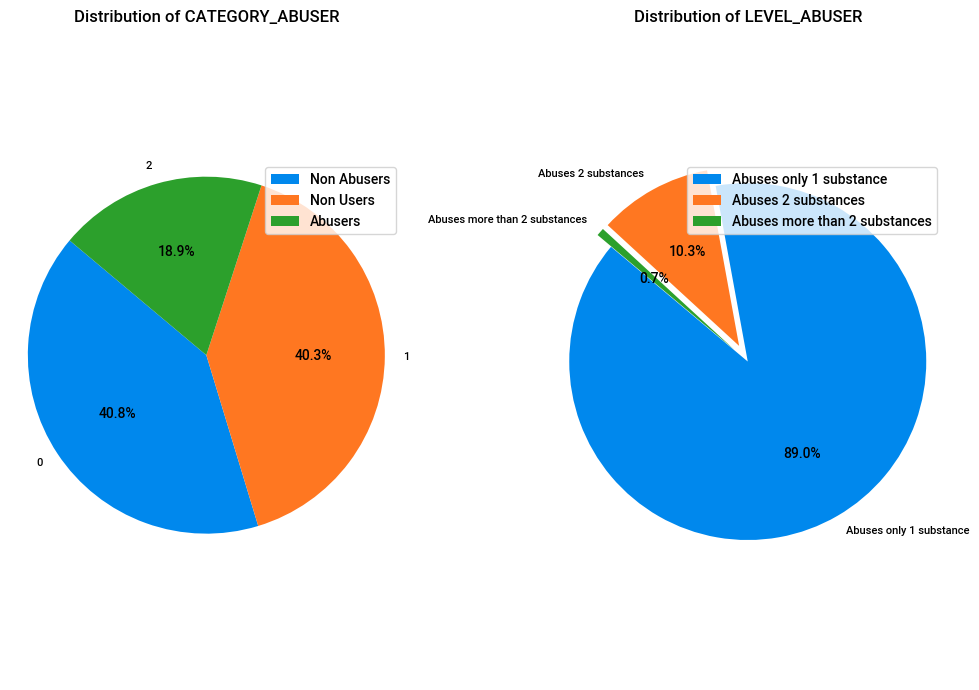

In [27]:
import matplotlib.pyplot as plt

# Calculate value counts for 'CATEGORY_ABUSER' column
category_counts = df['CATEGORY_ABUSER'].value_counts()

# Calculate value counts for 'LEVEL_ABUSER' column excluding value 0
level_counts_filtered = df[df['LEVEL_ABUSER'] != 0]['LEVEL_ABUSER'].value_counts()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 7))
explode = (0, 0.1, 0.1)

# Plot pie chart for 'CATEGORY_ABUSER' on the first subplot
axes[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of CATEGORY_ABUSER')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot pie chart for 'LEVEL_ABUSER' (excluding value 0) on the second subplot
# Define custom labels for LEVEL_ABUSER
level_labels = {1: 'Abuses only 1 substance',2: 'Abuses 2 substances',3: 'Abuses more than 2 substances'}

# Replace original index labels with custom labels
custom_labels_level = [level_labels[level] for level in level_counts_filtered.index]

axes[1].pie(level_counts_filtered, labels=custom_labels_level, autopct='%1.1f%%', startangle=140, explode = explode)
axes[1].set_title('Distribution of LEVEL_ABUSER')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legends
custom_labels_category = ['Non Abusers', 'Non Users', 'Abusers']
axes[0].legend(custom_labels_category, loc='upper right', bbox_to_anchor=(1, 0.8))
axes[1].legend(custom_labels_level, loc='upper right', bbox_to_anchor=(1, 0.8))

plt.tight_layout()
plt.show()


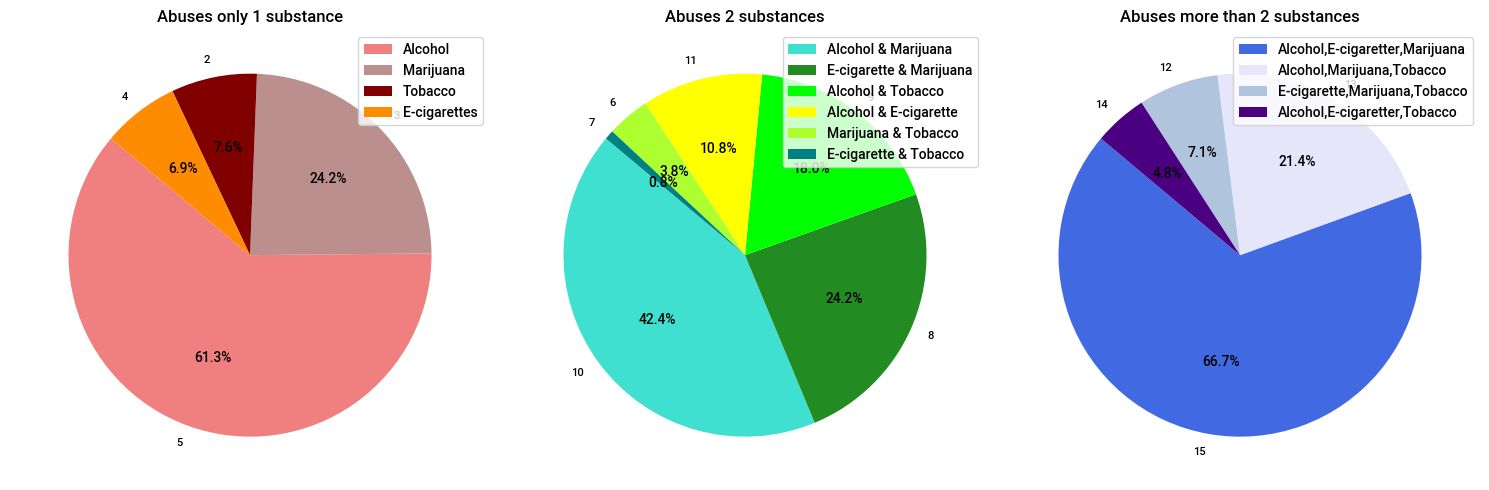

In [28]:
import matplotlib.pyplot as plt

# Define values for each pie chart and their corresponding labels and color schemes
charts_data = [
    {
        'values': [2, 3, 4, 5],
        'label': 'Abuses only 1 substance',
        'colors': ['lightcoral','rosybrown','maroon','darkorange'],
        'legend_labels': ['Alcohol', 'Marijuana', 'Tobacco', 'E-cigarettes']
    },
    {
        'values': [6, 7, 8, 9, 10, 11],
        'label': 'Abuses 2 substances',
        'colors': ['turquoise','forestgreen','lime','yellow','greenyellow','teal'],
        'legend_labels': ['Alcohol & Marijuana', 'E-cigarette & Marijuana', 'Alcohol & Tobacco', 'Alcohol & E-cigarette', 'Marijuana & Tobacco', 'E-cigarette & Tobacco']
    },
    {
        'values': [12, 13, 14, 15],
        'label': 'Abuses more than 2 substances',
        'colors': ['royalblue','lavender','lightsteelblue','indigo'],
        'legend_labels': ['Alcohol,E-cigaretter,Marijuana', 'Alcohol,Marijuana,Tobacco', 'E-cigarette,Marijuana,Tobacco', 'Alcohol,E-cigaretter,Tobacco']
    }
]

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot pie charts for each set of values
for i, chart_data in enumerate(charts_data):
    # Filter DataFrame for current set of values
    filtered_df = df[df['TYPE_ABUSER'].isin(chart_data['values'])]

    # Calculate value counts
    counts = filtered_df['TYPE_ABUSER'].value_counts()

    # Plot pie chart with custom labels and colors
    axes[i].pie(counts, labels=counts.index.map(str), autopct='%1.1f%%', startangle=140, colors=chart_data['colors'])
    axes[i].set_title(chart_data['label'])
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Add legend with custom labels
    axes[i].legend(labels=chart_data['legend_labels'], loc='upper right')

plt.tight_layout()
plt.show()


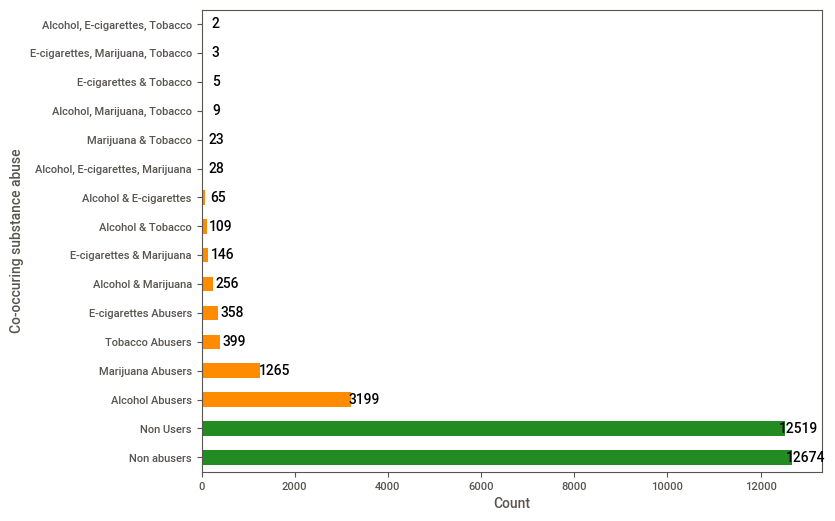

In [29]:
import matplotlib.pyplot as plt

# Define your legend labels
legend_labels = ['Non abusers', 'Non Users', 'Alcohol Abusers', 'Marijuana Abusers', 'Tobacco Abusers', 'E-cigarettes Abusers',
                 'Alcohol & Marijuana', 'E-cigarettes & Marijuana', 'Alcohol & Tobacco', 'Alcohol & E-cigarettes',
                 'Alcohol, E-cigarettes, Marijuana', 'Marijuana & Tobacco', 'Alcohol, Marijuana, Tobacco', 'E-cigarettes & Tobacco',
                 'E-cigarettes, Marijuana, Tobacco','Alcohol, E-cigarettes, Tobacco']

# Define colors for the bars
colors = ['forestgreen', 'darkorange']

# Define the first two bars to be of the same color and the rest all the same color
colors_for_bars = [colors[0]] * 2 + [colors[1]] * (len(legend_labels) - 2)

plt.figure(figsize=(8, 6))
bx = df['TYPE_ABUSER'].value_counts().plot(kind='barh', xlabel='Count', ylabel='Co-occuring substance abuse',
                                           color=colors_for_bars)

# Set the tick labels of the y-axis to your legend labels
plt.yticks(ticks=range(len(legend_labels)), labels=legend_labels)

# Add count values beside the bars
for p in bx.patches:
    bx.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.show()


2. EDA for Relationship betwen Mental health and Substance Abuse

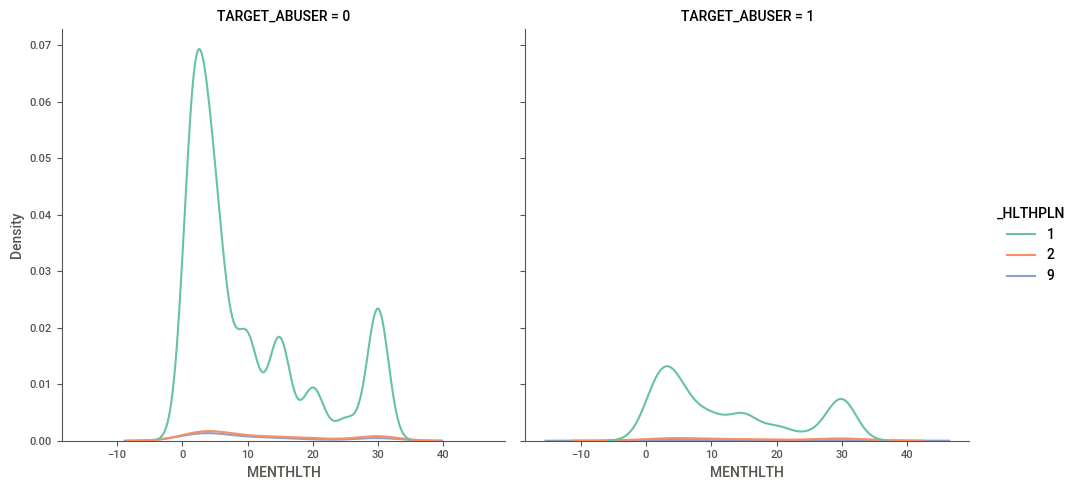

In [92]:
# Define the range of values for x that you want to include
x_min = 0
x_max = 30  # Adjust this as needed

# Filter the DataFrame to include only data within the specified range of x values
filtered_df = df[(df['MENTHLTH'] >= x_min) & (df['MENTHLTH'] <= x_max)]

# Plot the filtered data
sns.displot(data=filtered_df, x="MENTHLTH", hue="_HLTHPLN", col="TARGET_ABUSER", kind="kde", palette="Set2")
plt.show()

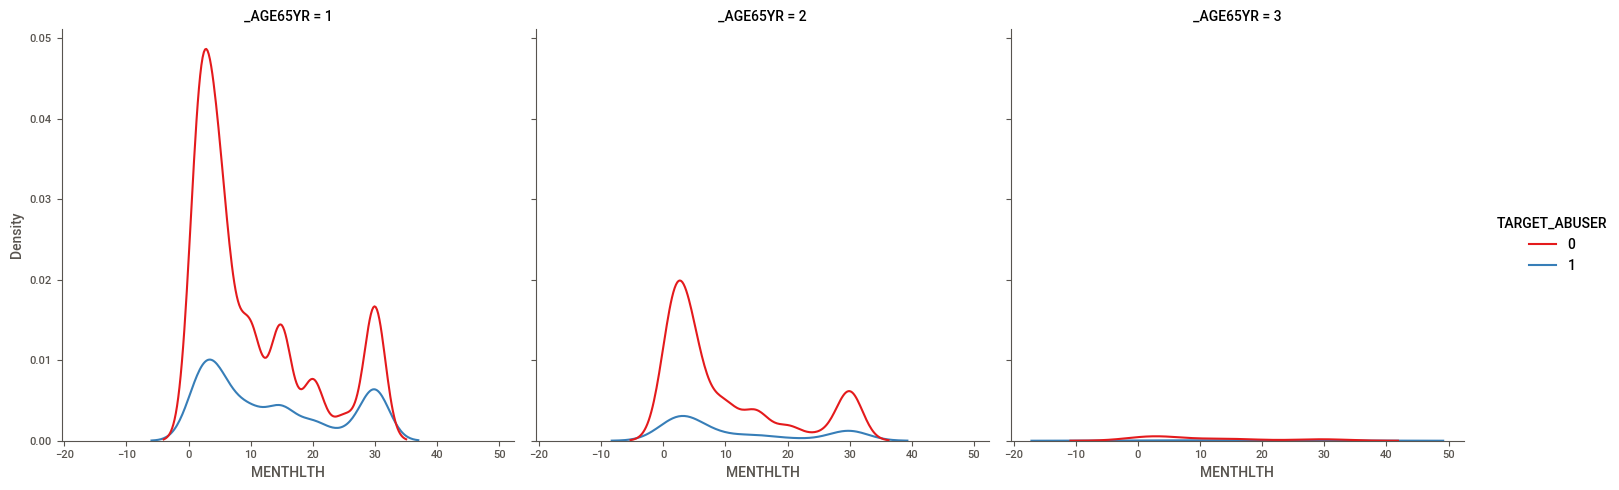

In [93]:
sns.displot(data=filtered_df, x="MENTHLTH", hue="TARGET_ABUSER", col = '_AGE65YR', kind="kde", palette="Set1")
plt.show()

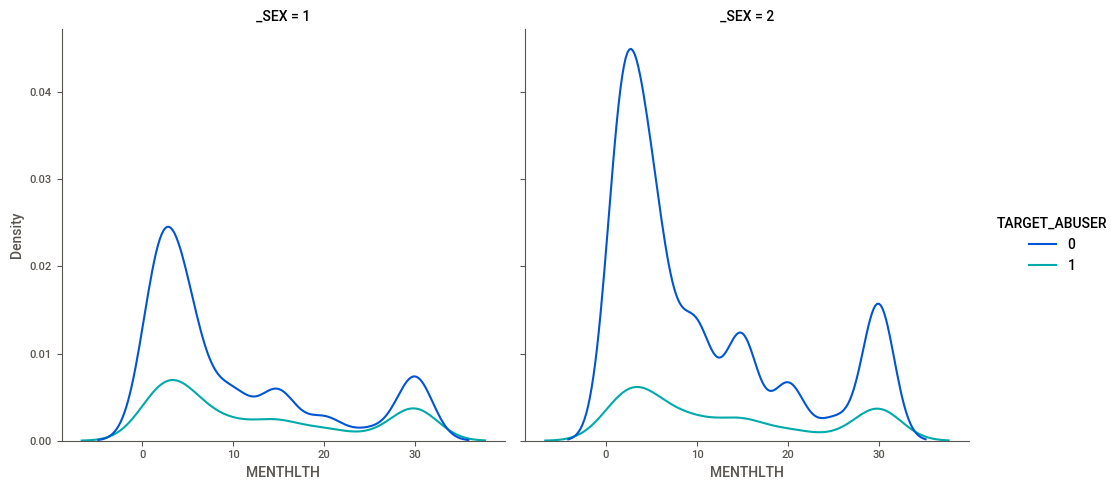

In [94]:
sns.displot(data=filtered_df, x="MENTHLTH", hue="TARGET_ABUSER", col = '_SEX', kind="kde", palette="winter")
plt.show()

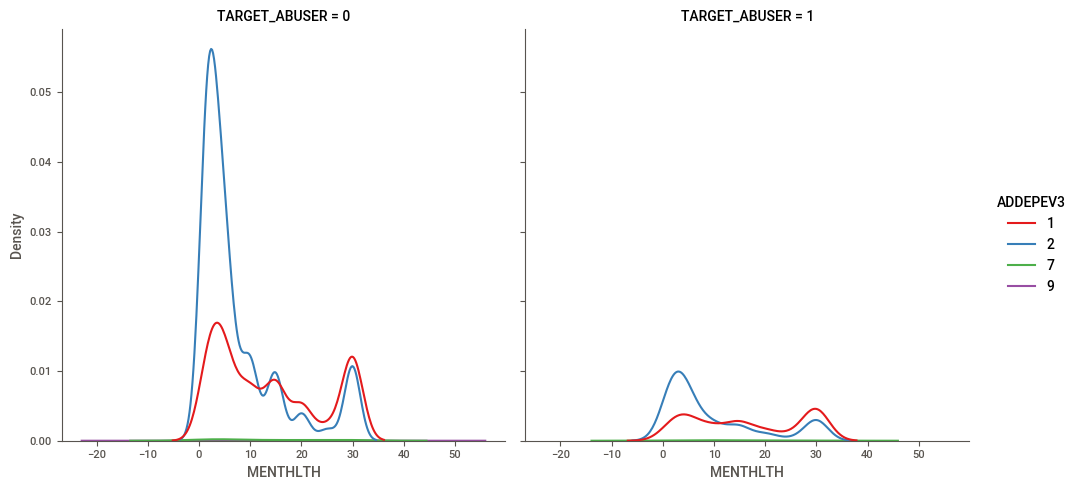

In [33]:
sns.displot(data=filtered_df, x="MENTHLTH", hue="ADDEPEV3", col="TARGET_ABUSER", kind="kde", palette="Set1")
plt.show()

In [97]:
filtered_df['MENTHLTH'].value_counts().head(10)

2     1685
30    1641
5     1357
3     1072
1     1059
15    1009
10    1001
20     560
4      548
7      501
Name: MENTHLTH, dtype: int64

In [95]:
filtered_df.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD3,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH5,MARITAL,EDUCA,RENTHOM1,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME3,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,USENOW3,ECIGNOW1,ALCDAY5,FLUSHOT7,PNEUVAC4,HIVTST7,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,MARIJAN1,_METSTAT,_URBSTAT,_IMPRACE,_DUALUSE,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPLN,_HCVU652,_TOTINDA,_LTASTH1,_CASTHM1,_ASTHMS1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI1,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_AIDTST4,MARIJ_ABUSER,ECIG_ABUSER,TOBA_ABUSER,ALCO_ABUSER,LEVEL_ABUSER,TARGET_ABUSER,TYPE_ABUSER,CATEGORY_ABUSER,ACESCORE,VULNERABLE,CHRONIC,DISABILITY
count,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000,11394.000
mean,40.042,6.528,6917513.168,6.759,15.606,2021.681,1.615,2.785,48.026,10.703,8.755,1.628,1.895,1.501,1.246,1.980,1.992,1.970,1.818,1.949,1.915,1.925,1.645,1.981,2.765,1.656,2.606,5.106,1.462,1.323,1.909,3.560,63.594,19.000,618.414,653.129,1.923,1.947,1.838,1.829,1.952,1.907,1.604,2.958,2.251,479.242,1.519,2.164,1.895,1.837,1.792,1.976,2.013,1.911,1.633,1.764,2.138,1.570,1.494,1.398,4.428,4.726,73.994,1.316,1.120,1.550,6.177,1.253,1.865,2.337,1.262,3.430,1.249,1.239,1.237,2.731,4.903,4.991,1.996,1.929,1.359,1.637,1.695,1.615,6.852,1.292,50.652,4.015,2.090,1.567,3.120,5.096,3.355,1.191,1.075,1.422,18.390,1.227,851.163,1.122,2.004,0.096,0.035,0.014,0.110,0.256,0.220,1.418,0.794,2.782,0.697,1.063,0.398
std,7.101,3.206,3343120.465,3.345,8.390,0.507,0.487,1.070,38.802,10.002,21.970,0.875,0.412,1.122,0.480,0.459,0.547,0.359,0.530,0.493,0.468,0.482,0.674,0.437,0.716,0.636,1.865,0.949,0.821,1.276,0.405,2.859,38.856,29.271,1952.225,1083.054,0.412,0.352,0.675,0.509,0.309,0.463,0.627,0.263,1.214,350.764,0.695,1.721,1.329,1.160,1.059,1.034,0.947,1.325,1.461,1.407,1.475,1.516,1.495,1.452,1.204,0.934,28.835,0.465,0.325,1.329,3.688,0.545,1.248,0.473,1.310,3.639,0.515,0.654,0.916,0.988,18.066,18.060,0.686,2.213,1.212,1.565,1.764,0.487,3.633,0.480,17.788,1.666,1.723,1.104,0.940,2.210,1.052,0.678,0.264,0.494,28.053,0.734,7212.927,0.630,1.759,0.295,0.184,0.119,0.313,0.517,0.414,2.166,0.777,2.723,0.460,1.215,0.490
min,32.000,1.000,1012022.000,1.000,1.000,2021.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,55.000,400.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,101.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.00

In [99]:
filtered_df[filtered_df['_AGE65YR']==1]['MENTHLTH'].median()

7.0

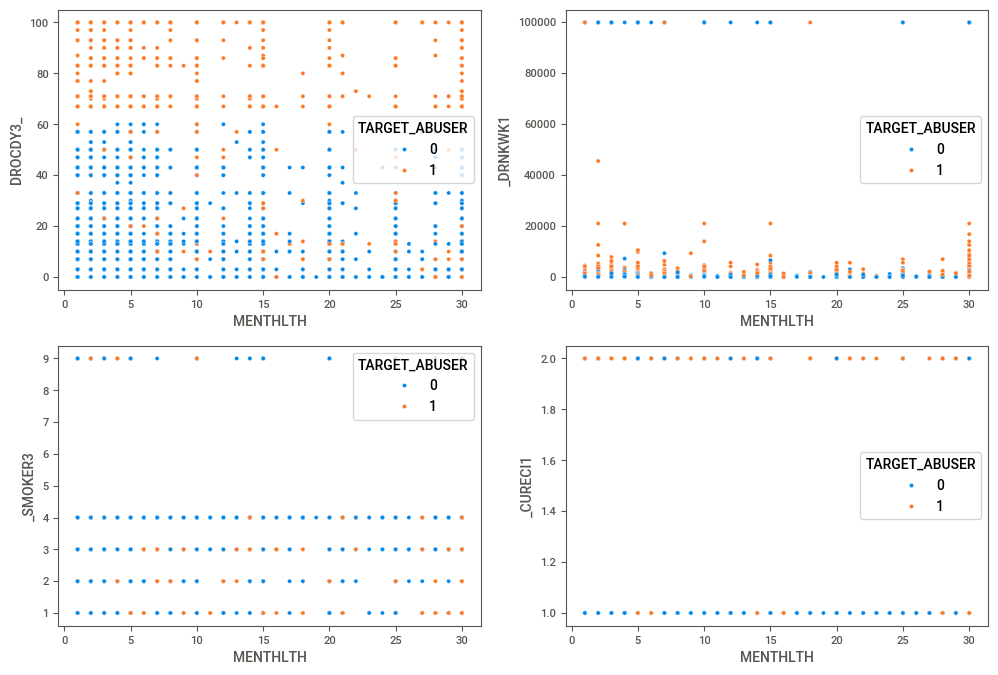

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the range of values for x that you want to include
x_min = 0
x_max = 30  # Adjust this as needed

# Filter the DataFrame to include only data within the specified range of x values
filtered_df = df[(df['MENTHLTH'] >= x_min) & (df['MENTHLTH'] <= x_max)]

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the scatterplots
sns.scatterplot(data=filtered_df, x="MENTHLTH", y="DROCDY3_", hue="TARGET_ABUSER", ax=axs[0, 0])
sns.scatterplot(data=filtered_df, x="MENTHLTH", y="_DRNKWK1", hue="TARGET_ABUSER", ax=axs[0, 1])
sns.scatterplot(data=filtered_df, x="MENTHLTH", y="_SMOKER3", hue="TARGET_ABUSER", ax=axs[1, 0])
sns.scatterplot(data=filtered_df, x="MENTHLTH", y="_CURECI1", hue="TARGET_ABUSER", ax=axs[1, 1])

plt.show()


3. Explaining Correlation among ACE variables

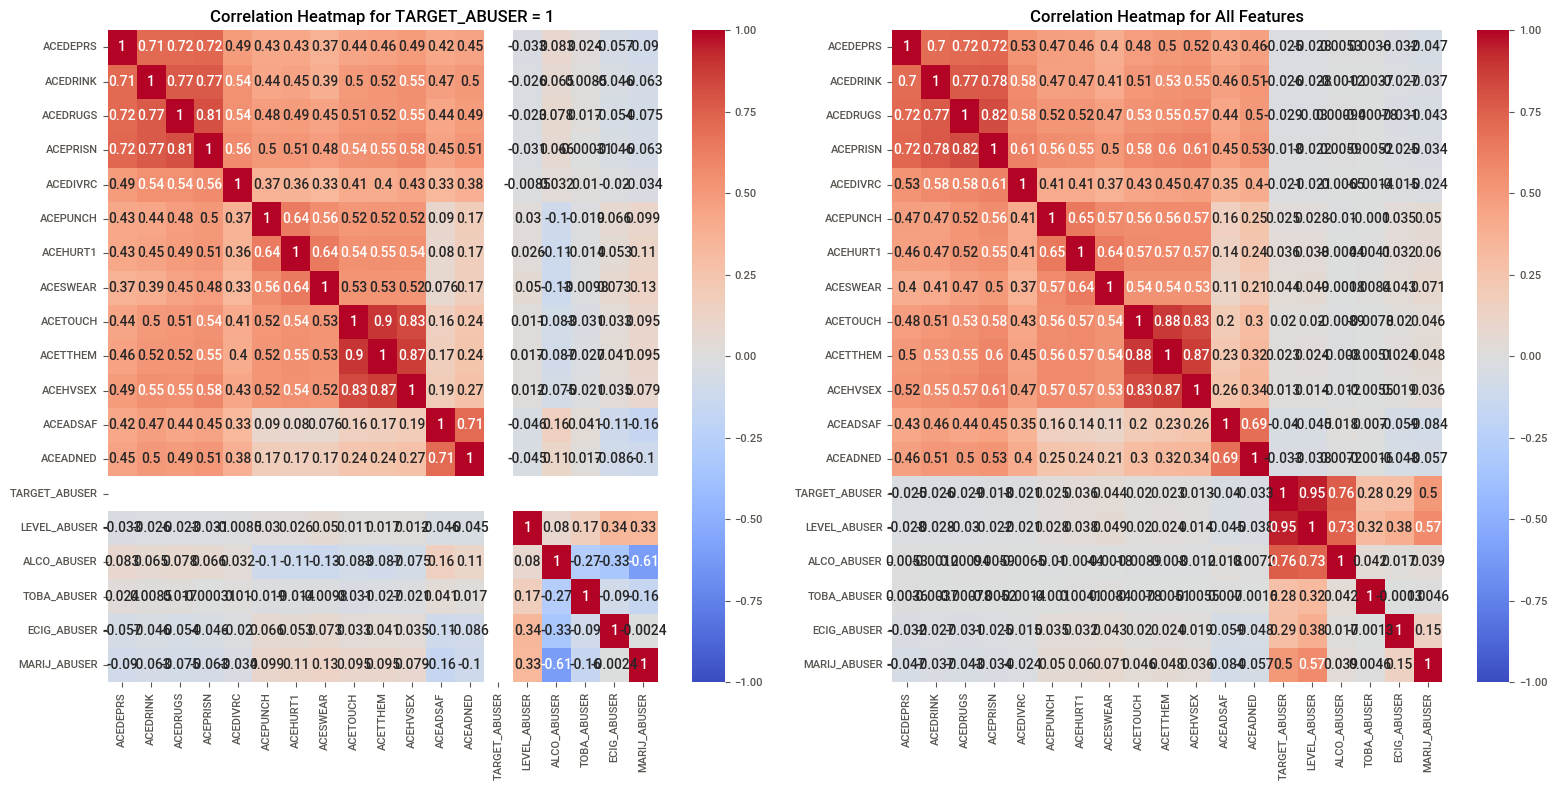

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe where TARGET_ABUSER is 1
subset_df1 = df[df['TARGET_ABUSER'] == 1]
#subset_df2 = df[df['TARGET_ABUSER'] == 0]
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap for subset where TARGET_ABUSER = 1
sns.heatmap(subset_df1[ace+target].corr(), cmap="coolwarm", annot=True, ax=axes[0], vmax=1, vmin=-1)
axes[0].set_title('Correlation Heatmap for TARGET_ABUSER = 1')

# Heatmap for combined features (ace and target)
sns.heatmap(df[ace + target].corr(), cmap="coolwarm", annot=True, ax=axes[1], vmax=1, vmin=-1)
axes[1].set_title('Correlation Heatmap for All Features')

plt.tight_layout()
plt.show()


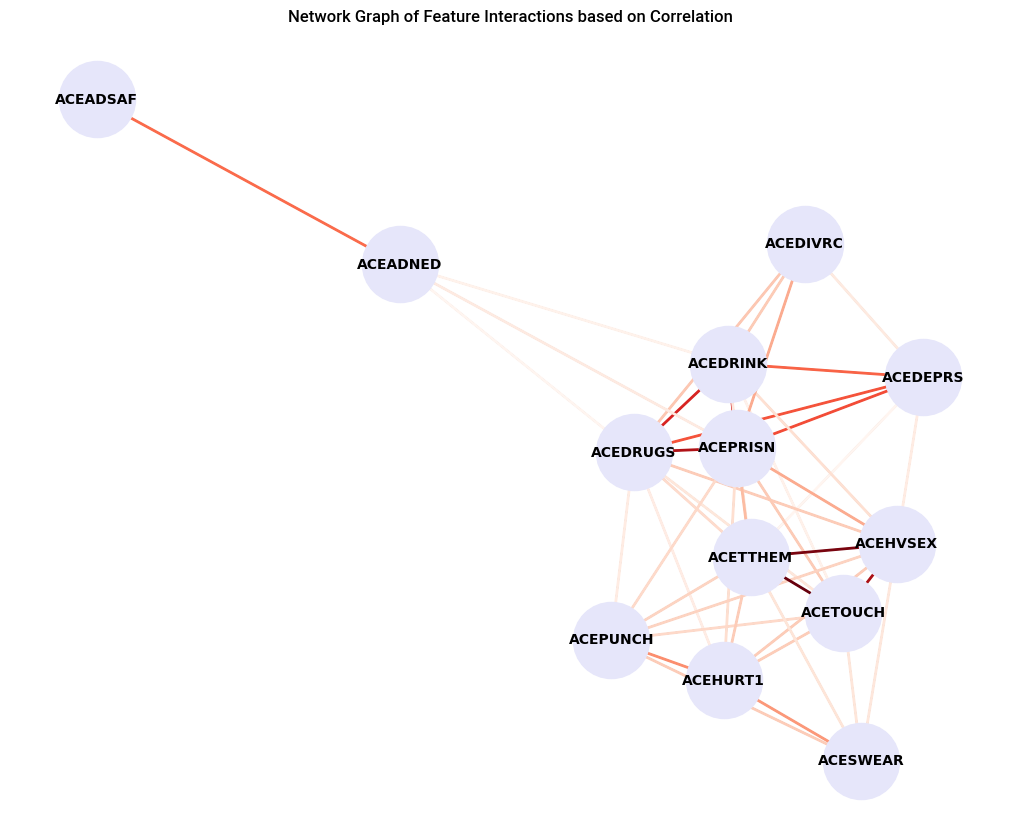

In [36]:
#Adding a threshold for the correlation values when creating edges, only 0.5 and above will be represented
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

correlation_matrix = df[ace].corr()

# Create a graph from the correlation matrix
G = nx.Graph()

# Add nodes to the graph
for feature in correlation_matrix.columns:
    G.add_node(feature)

# Add edges to the graph based on correlation values
threshold = 0.50  # Set a threshold for correlation values
for i, feature1 in enumerate(correlation_matrix.columns):
    for j, feature2 in enumerate(correlation_matrix.columns):
        if i < j:
            correlation = correlation_matrix.loc[feature1, feature2]
            if abs(correlation) >= threshold:
                G.add_edge(feature1, feature2, weight=correlation)

# Draw the graph
plt.figure(figsize=(10, 8))

# Set a random seed for reproducibility
pos = nx.spring_layout(G, seed=42)

# Draw nodes and edges with different styles based on weights
edges = G.edges(data=True)
weights = [abs(edge[2]['weight']) for edge in edges]
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lavender', font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, edge_color=weights, edge_cmap=plt.cm.Reds, width=2)

plt.title('Network Graph of Feature Interactions based on Correlation')
plt.show()


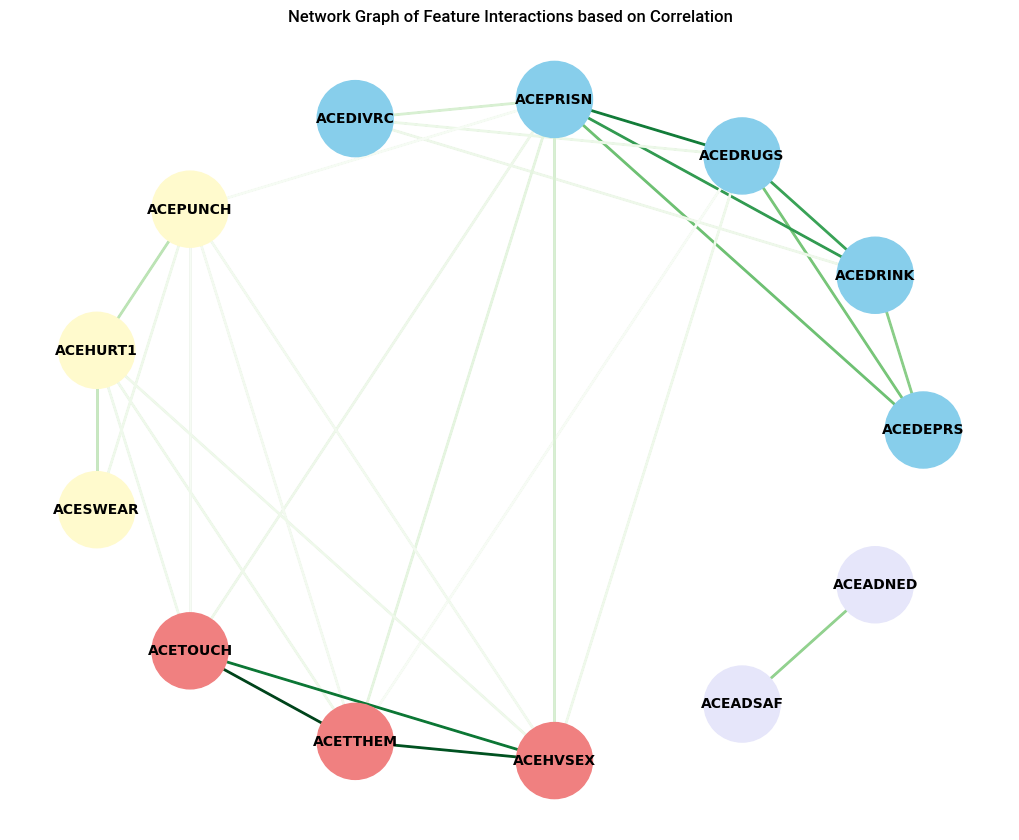

In [37]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df[ace] is a DataFrame with the relevant data
correlation_matrix = df[ace].corr()

# Create a graph from the correlation matrix
G = nx.Graph()

# Add nodes to the graph
for feature in correlation_matrix.columns:
    G.add_node(feature)

# Add edges to the graph based on correlation values
threshold = 0.55  # Set a threshold for correlation values
for i, feature1 in enumerate(correlation_matrix.columns):
    for j, feature2 in enumerate(correlation_matrix.columns):
        if i < j:
            correlation = correlation_matrix.loc[feature1, feature2]
            if abs(correlation) >= threshold:
                G.add_edge(feature1, feature2, weight=correlation)

# Define the groups of nodes
group1 = {"ACETTHEM", "ACEHVSEX", "ACETOUCH"}
group2 = {"ACEADSAF", "ACEADNED"}
group3 = {"ACESWEAR", "ACEHURT1", "ACEPUNCH"}

# Assign colors to the nodes based on whether they are in the highly correlated group
node_colors = []
for node in G.nodes():
    if node in group1:
        node_colors.append('lightcoral')  # Color for highly correlated nodes
    elif node in group2:
        node_colors.append('lavender')
    elif node in group3:
        node_colors.append('lemonchiffon')
    else:
        node_colors.append('skyblue')  # Default color for other nodes

# Draw the graph
plt.figure(figsize=(10, 8))

# Use circular layout
pos = nx.circular_layout(G)

# Draw nodes and edges with different styles based on weights
edges = G.edges(data=True)
weights = [abs(edge[2]['weight']) for edge in edges]
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=node_colors, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, edge_color=weights, edge_cmap=plt.cm.Greens, width=2)

plt.title('Network Graph of Feature Interactions based on Correlation')
plt.show()


In [38]:
# Define a function to calculate ACESCORE based on the conditions
def calculate_ace_score(row):
    score = 0

    if row['ACEADSAF'] in [1, 2]:
        score += 1

    if row['ACEADNED'] in [1, 2]:
        score += 1

    if row['ACEHVSEX'] in [2, 3]:
        score += 1

    if row['ACETTHEM'] in [2, 3]:
        score += 1

    if row['ACETOUCH'] in [2, 3]:
        score += 1

    if row['ACESWEAR'] in [2, 3]:
        score += 1

    if row['ACEHURT1'] in [2, 3]:
        score += 1

    if row['ACEPUNCH'] in [2, 3]:
        score += 1

    if row['ACEDEPRS'] == 1:
        score += 1

    if row['ACEDRINK'] == 1:
        score += 1

    if row['ACEDRUGS'] == 1:
        score += 1

    if row['ACEPRISN'] == 1:
        score += 1

    if row['ACEDIVRC'] == 1:
        score += 1

    return score

# Apply the function to each row to create the ACESCORE column
df['ACESCORE'] = df.apply(calculate_ace_score, axis=1)

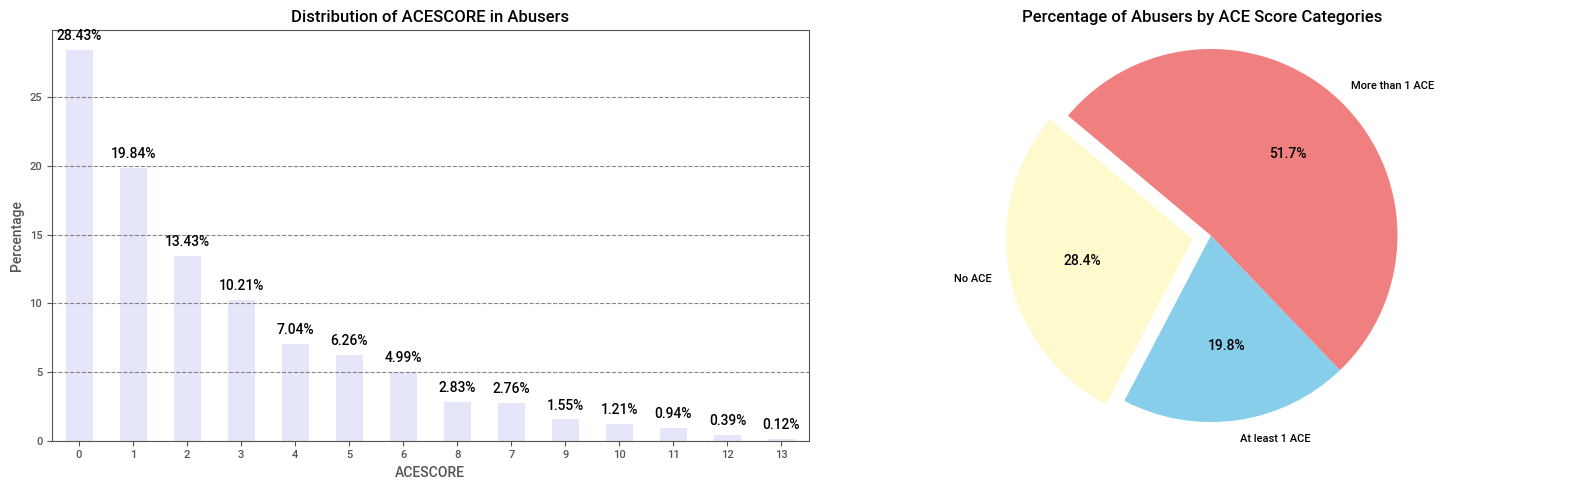

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
df_target_1 = df[df['TARGET_ABUSER'] == 1]

# Calculate value counts and percentages for the first graph
ace_score_counts = df['ACESCORE'].value_counts(normalize=True) * 100
colors = sns.color_palette("winter", len(ace_score_counts))
colors.reverse()

# Plot the first graph
ace_score_counts_target_1 = df_target_1['ACESCORE'].value_counts(normalize=True) * 100
ax1 = ace_score_counts_target_1.plot(kind='bar', color="lavender", ax=axes[0])
ax1.set_title('Distribution of ACESCORE in Abusers')
ax1.set_xlabel('ACESCORE')
ax1.set_ylabel('Percentage')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Display the values on top of the bars for the first graph
for i, v in enumerate(ace_score_counts_target_1):
    ax1.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom')

# Calculate the percentage of abusers falling into each category for the second graph
total_abusers = len(df_target_1)
no_ace_percentage = (df_target_1['ACESCORE'] == 0).sum() / total_abusers * 100
at_least_one_ace_percentage = ((df_target_1['ACESCORE'] > 0) & (df_target_1['ACESCORE'] <= 1)).sum() / total_abusers * 100
more_than_one_ace_percentage = (df_target_1['ACESCORE'] > 1).sum() / total_abusers * 100

# Create labels and percentages for the pie chart
labels = ['No ACE', 'At least 1 ACE', 'More than 1 ACE']
sizes = [no_ace_percentage, at_least_one_ace_percentage, more_than_one_ace_percentage]
explode = (0.1, 0, 0)  # Explode the slice with 'At least 1 ACE' for better visibility

colors1 = sns.color_palette("summer",3)
#colors1.reverse()

# Plot the second graph
ax2 = axes[1]
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lemonchiffon','skyblue','lightcoral'])
ax2.set_title('Percentage of Abusers by ACE Score Categories')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plots
plt.tight_layout()
plt.show()


In [40]:
# Define a function to calculate ACESCORE_REASON based on the conditions
def calculate_ace_score_reason(row):
    reasons = []

    if row['ACEADSAF'] in [1,2]:
        reasons.append('ACEADSAF')

    if row['ACEADNED'] in [1,2]:
        reasons.append('ACEADNED')

    if row['ACEHVSEX'] in [2, 3]:
        reasons.append('ACEHVSEX')

    if row['ACETTHEM'] in [2, 3]:
        reasons.append('ACETTHEM')

    if row['ACETOUCH'] in [2, 3]:
        reasons.append('ACETOUCH')

    if row['ACESWEAR'] in [2, 3]:
        reasons.append('ACESWEAR')

    if row['ACEHURT1'] in [2, 3]:
        reasons.append('ACEHURT1')

    if row['ACEPUNCH'] in [2, 3]:
        reasons.append('ACEPUNCH')

    if row['ACEDEPRS'] == 1:
        reasons.append('ACEDEPRS')

    if row['ACEDRINK'] == 1:
        reasons.append('ACEDRINK')

    if row['ACEDRUGS'] == 1:
        reasons.append('ACEDRUGS')

    if row['ACEPRISN'] == 1:
        reasons.append('ACEPRISN')

    if row['ACEDIVRC'] == 1:
        reasons.append('ACEDIVRC')

    return ', '.join(reasons)

# Apply the function to each row to create the ACESCORE_REASON column
df['ACESCORE_REASON'] = df.apply(calculate_ace_score_reason, axis=1)

In [41]:
df['ACESCORE_REASON'].value_counts().head(21)

                                11222
ACESWEAR                         1859
ACEDIVRC                         1387
ACEDRINK                         1032
ACEHURT1                          918
ACEDEPRS                          622
ACESWEAR, ACEHURT1                621
ACESWEAR, ACEDRINK                411
ACESWEAR, ACEDIVRC                379
ACEDRINK, ACEDIVRC                300
ACESWEAR, ACEDEPRS                291
ACEPUNCH                          229
ACETOUCH                          208
ACESWEAR, ACEHURT1, ACEDRINK      184
ACEHURT1, ACEDRINK                176
ACESWEAR, ACEHURT1, ACEDEPRS      172
ACEDEPRS, ACEDRINK                171
ACEADSAF                          160
ACEHURT1, ACEDIVRC                159
ACESWEAR, ACEHURT1, ACEPUNCH      158
ACESWEAR, ACEHURT1, ACEDIVRC      151
Name: ACESCORE_REASON, dtype: int64

4. Explaining social determinants of Substance Abuse. What percentage of abusers come from vulnerable groups vs priviledged social groups?

In [42]:
# Defining vulnerable populations

# Define the conditions
conditions = ((df['_AGEG5YR'] == 1) |(df['ADDEPEV3'] == 1) |(df['_INCOMG1'] == 1) |(df['_RACE'].isin ([3,5])) |(df['ACEDRUGS'] == 1) |(df['_EDUCAG'] == 1)|
              (df['_AIDTST4'] == 1))

# Assign values based on conditions
df.loc[conditions, 'VULNERABLE'] = 1
df.loc[~conditions, 'VULNERABLE'] = 0


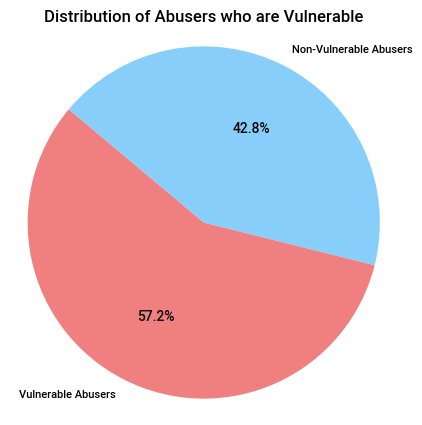

In [43]:
import matplotlib.pyplot as plt

# Filter the DataFrame for abusers who are vulnerable
vulnerable_abusers = df[(df['TARGET_ABUSER'] == 1) & (df['VULNERABLE'] == 1)]

# Count the number of vulnerable abusers
vulnerable_abusers_count = len(vulnerable_abusers)

# Count the number of non-vulnerable abusers
non_vulnerable_abusers_count = len(df[df['TARGET_ABUSER'] == 1]) - vulnerable_abusers_count

# Create labels and sizes for the pie chart
labels = ['Vulnerable Abusers', 'Non-Vulnerable Abusers']
sizes = [vulnerable_abusers_count, non_vulnerable_abusers_count]
colors = ['lightcoral', 'lightskyblue']

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Abusers who are Vulnerable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


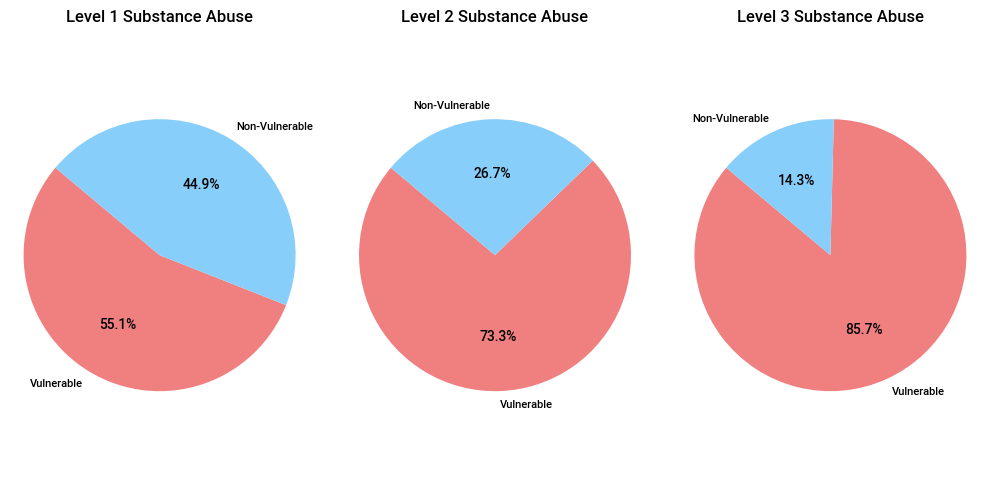

In [44]:
import matplotlib.pyplot as plt

# Define the levels of substance abuse
levels = [1, 2, 3]

# Initialize lists to store counts for each level
level_counts = []
vulnerable_counts = []

# Calculate counts for each level and vulnerable counts
for level in levels:
    # Filter the DataFrame for the specified level of substance abuse and vulnerable individuals
    level_df = df[(df['LEVEL_ABUSER'] == level)]
    vulnerable_df = level_df[level_df['VULNERABLE'] == 1]

    # Count the number of individuals in each level and the number of vulnerable individuals
    level_count = len(level_df)
    vulnerable_count = len(vulnerable_df)

    # Append the counts to the respective lists
    level_counts.append(level_count)
    vulnerable_counts.append(vulnerable_count)

# Plot the pie charts for each level
plt.figure(figsize=(10, 5))
for i, level in enumerate(levels):
    plt.subplot(1, 3, i+1)
    labels = ['Vulnerable', 'Non-Vulnerable']
    sizes = [vulnerable_counts[i], level_counts[i] - vulnerable_counts[i]]
    colors = ['lightcoral', 'lightskyblue']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Level {level} Substance Abuse')
    plt.axis('equal')

plt.tight_layout()
plt.show()


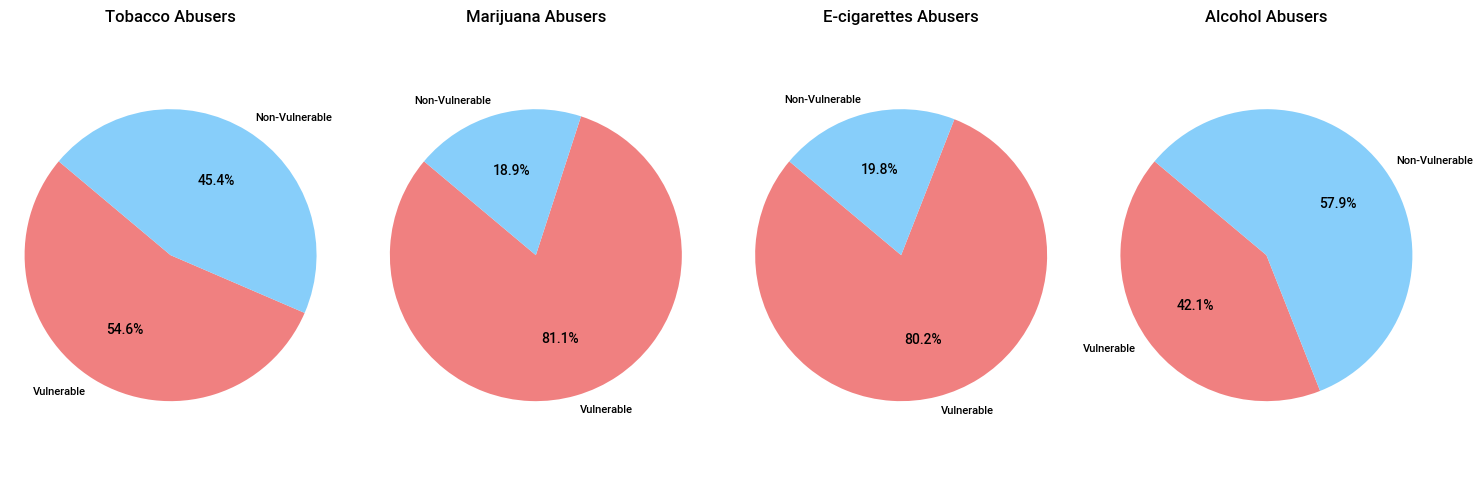

In [45]:
import matplotlib.pyplot as plt

# Define the types of substance abuse and corresponding titles
types = [2, 3, 4, 5]
titles = ['Tobacco Abusers', 'Marijuana Abusers', 'E-cigarettes Abusers', 'Alcohol Abusers']

# Initialize lists to store counts for each type
type_counts = []
vulnerable_counts = []

# Calculate counts for each type and vulnerable counts
for type_abuser in types:
    # Filter the DataFrame for the specified type of substance abuse and vulnerable individuals
    type_df = df[(df['TYPE_ABUSER'] == type_abuser)]
    vulnerable_df = type_df[type_df['VULNERABLE'] == 1]

    # Count the number of individuals in each type and the number of vulnerable individuals
    type_count = len(type_df)
    vulnerable_count = len(vulnerable_df)

    # Append the counts to the respective lists
    type_counts.append(type_count)
    vulnerable_counts.append(vulnerable_count)

# Plot the pie charts for each type
plt.figure(figsize=(15, 5))
for i, type_abuser in enumerate(types):
    plt.subplot(1, 4, i+1)
    labels = ['Vulnerable', 'Non-Vulnerable']
    sizes = [vulnerable_counts[i], type_counts[i] - vulnerable_counts[i]]
    colors = ['lightcoral', 'lightskyblue']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(titles[i])  # Set the title using the corresponding title from the list
    plt.axis('equal')

plt.tight_layout()
plt.show()


Add : How many abusers are from low income, lack of education, employment status, living situation

5. Physical health issues - Here we are exploring some common combinations of chronic illness in substance abusers. Among abusers, what percentage have more than 1 chronic illness, 2 chronic illness or more? Also how does the division look based on SEX and AGE groups?

In [46]:
# Define a function to get the chronic conditions for each row
def get_chronic_conditions(row):
    conditions = []
    if row['DIABETE4'] == 1:
        conditions.append('Diabetes')
    if row['CVDCRHD4'] == 1:
        conditions.append('Heart Disease')
    if row['CHCKDNY2'] == 1:
        conditions.append('Kidney Disease')
    if row['ASTHMA3'] == 1:
        conditions.append('Asthma')
    if row['CHCCOPD3'] == 1:
        conditions.append('COPD')
    if row['CHCOCNCR'] == 1:
        conditions.append('Cancer')
    if row['HAVARTH5'] == 1:
        conditions.append('Arthritis')
    if row['CVDSTRK3'] == 1:
        conditions.append('Stroke')
    return conditions

# Create a new column to store chronic conditions for each participant
df['Chronic_Conditions_List'] = df.apply(get_chronic_conditions, axis=1)

# Convert the list of conditions to a string
df['Chronic_Conditions_List'] = df['Chronic_Conditions_List'].apply(lambda x: ', '.join(x) if x else 'None')

# Calculate total chronic conditions for each participant
df['CHRONIC'] = df[['DIABETE4', 'CVDCRHD4', 'CHCKDNY2', 'ASTHMA3', 'CHCCOPD3',
                    'CHCOCNCR', 'HAVARTH5', 'CVDSTRK3']].apply(lambda row: row.value_counts().get(1, 0), axis=1)

# Categorize participants based on the total chronic conditions
def categorize_conditions(count):
    if count == 0:
        return 'No chronic condition'
    elif count == 1:
        return 'Single chronic condition'
    elif count == 2:
        return '2 chronic conditions'
    else:
        return 'More than 2 chronic conditions'

df['CHRONIC_CATEGORY'] = df['CHRONIC'].apply(categorize_conditions)

In [47]:
df['CHRONIC_CATEGORY'].value_counts()

No chronic condition              13138
Single chronic condition           9505
2 chronic conditions               5031
More than 2 chronic conditions     3386
Name: CHRONIC_CATEGORY, dtype: int64

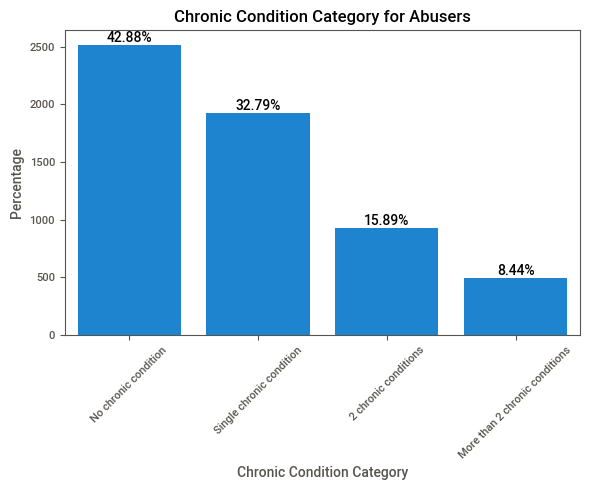

In [48]:
# Filter the dataframe for cases where TARGET_ABUSER is 1
df_target_abuser_1 = df[df['TARGET_ABUSER'] == 1]

# Calculate the percentage of each chronic condition category
total_cases = len(df_target_abuser_1)
category_counts = df_target_abuser_1['CHRONIC_CATEGORY'].value_counts()
category_percentages = (category_counts / total_cases) * 100

# Plot CHRONIC_CATEGORY against TARGET_ABUSER=1
plt.figure(figsize=(6, 5))
sns.countplot(x='CHRONIC_CATEGORY', data=df_target_abuser_1, order=category_counts.index)
plt.title('Chronic Condition Category for Abusers')
plt.xlabel('Chronic Condition Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Display percentage on top of each bar
for i, count in enumerate(category_counts):
    percentage = category_percentages[i]
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [100]:
df[df['CHRONIC_CATEGORY']=='More than 2 chronic conditions']['EDUCA'].value_counts()

5    1128
6    1083
4     923
3     174
2      71
9       4
1       3
Name: EDUCA, dtype: int64

<ipython-input-50-14fb2a96abff>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
<ipython-input-50-14fb2a96abff>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
<ipython-input-50-14fb2a96abff>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
<ipython-input-50-14fb2a96abff>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


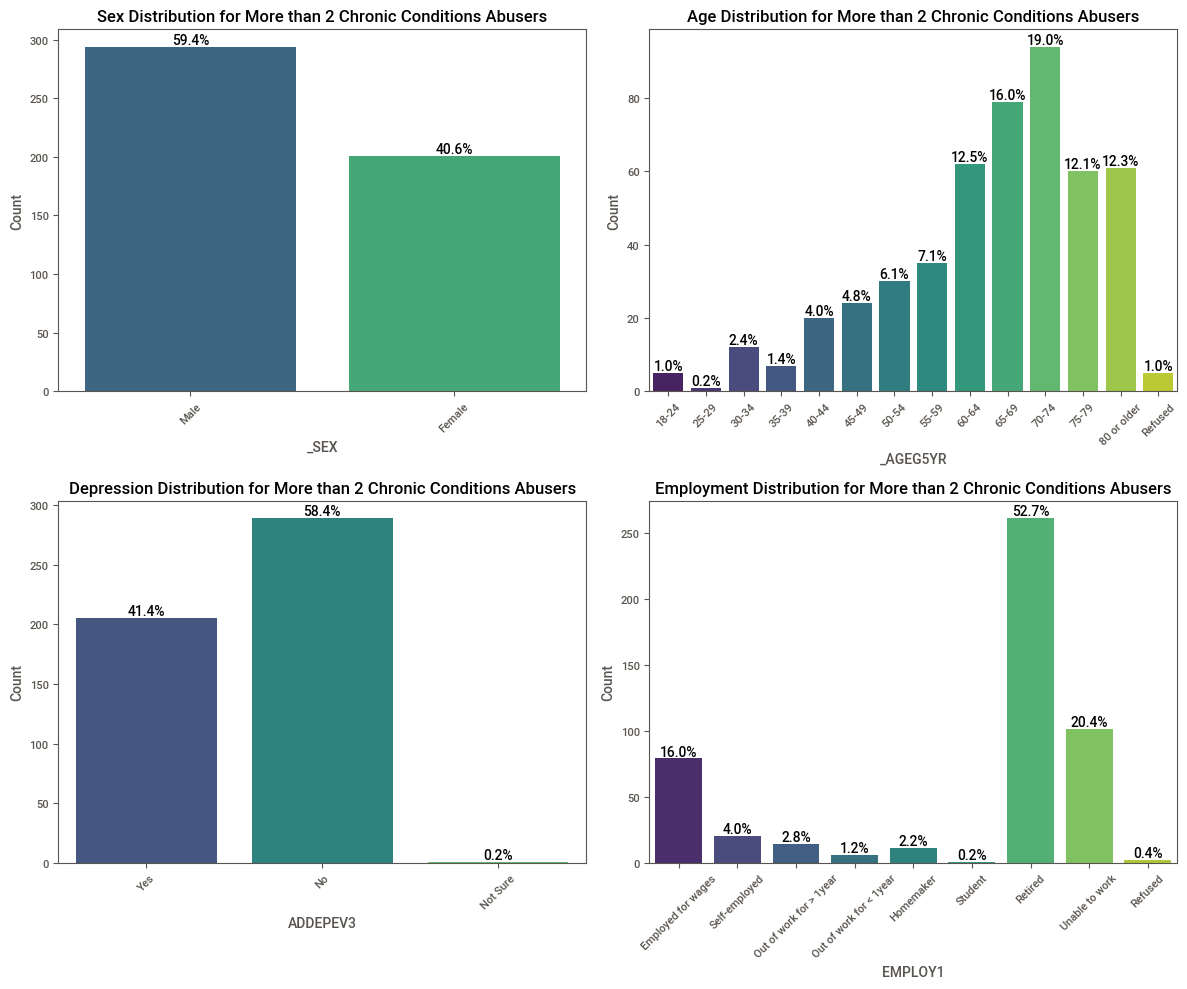

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot countplot for a given condition
def plot_condition_countplot(data, condition, title, ax, xticklabels):
    sns.countplot(x=condition, data=data, palette='viridis', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(condition)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticklabels(xticklabels)

    # Calculate and display percentage on top of each bar
    total_count = len(data)
    for p in ax.patches:
        percentage = p.get_height() / total_count * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Filter the dataframe for cases where TARGET_ABUSER is 1
df_target_abuser_1 = df[df['TARGET_ABUSER'] == 1]

# Define x-axis labels for each condition
sex_xticklabels = ['Male', 'Female']
age_xticklabels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older', 'Refused']
depression_xticklabels = ['Yes', 'No', 'Not Sure']
employment_xticklabels = ['Employed for wages', 'Self-employed', 'Out of work for > 1year', 'Out of work for < 1year', 'Homemaker', 'Student', 'Retired',
                          'Unable to work', 'Refused']

# Plot for '_SEX'
plot_condition_countplot(df_target_abuser_1[df_target_abuser_1['CHRONIC_CATEGORY'] == 'More than 2 chronic conditions'], '_SEX', 'Sex Distribution for More than 2 Chronic Conditions Abusers', axes[0, 0], sex_xticklabels)

# Plot for '_AGEG5YR'
plot_condition_countplot(df_target_abuser_1[df_target_abuser_1['CHRONIC_CATEGORY'] == 'More than 2 chronic conditions'], '_AGEG5YR', 'Age Distribution for More than 2 Chronic Conditions Abusers', axes[0, 1], age_xticklabels)

# Plot for 'ADDEPEV3'
plot_condition_countplot(df_target_abuser_1[df_target_abuser_1['CHRONIC_CATEGORY'] == 'More than 2 chronic conditions'], 'ADDEPEV3', 'Depression Distribution for More than 2 Chronic Conditions Abusers', axes[1, 0], depression_xticklabels)

# Plot for 'EMPLOY1'
plot_condition_countplot(df_target_abuser_1[df_target_abuser_1['CHRONIC_CATEGORY'] == 'More than 2 chronic conditions'], 'EMPLOY1', 'Employment Distribution for More than 2 Chronic Conditions Abusers', axes[1, 1], employment_xticklabels)

# Adjust layout
plt.tight_layout()
plt.show()


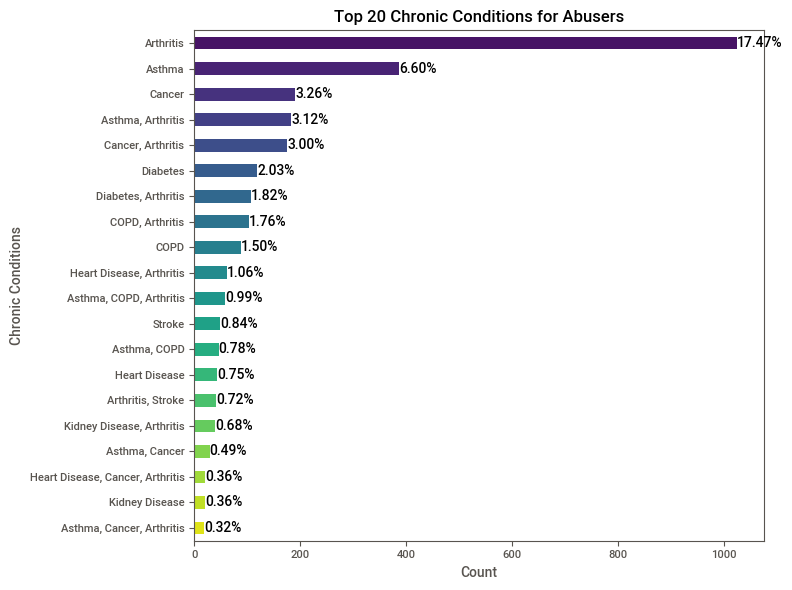

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe for cases where TARGET_ABUSER is 1
df_abusers1 = df[df['TARGET_ABUSER'] == 1]

# Get the top 20 chronic conditions
top_20_conditions = df_abusers1['Chronic_Conditions_List'].value_counts().head(21)
# Exclude the topmost entry (as it will be removed)
top_20_conditions = top_20_conditions[1:]

# Set color palette
colors = sns.color_palette("viridis", len(top_20_conditions))
# Reverse the palette
#colors.reverse()

# Plot the top 20 chronic conditions in a horizontal bar chart
plt.figure(figsize=(8, 6))
top_20_conditions.plot(kind='barh', color=colors)
plt.title('Top 20 Chronic Conditions for Abusers')
plt.xlabel('Count')
plt.ylabel('Chronic Conditions')
plt.gca().invert_yaxis()  # Invert y-axis to have highest count at the top

# Calculate and display percentages on top of each bar
total_abusers = len(df_abusers1)
for i, count in enumerate(top_20_conditions):
    percentage = (count / total_abusers) * 100
    plt.text(count, i, f'{percentage:.2f}%', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


6. Does having a disability affect substance abuse behaviour?

In [52]:
# Define the conditions
conditions = (
    (df['BLIND'] == 1) |
    (df['DEAF'] == 1) |
    (df['DECIDE'] == 1) |
    (df['DIFFWALK'] == 1) |
    (df['DIFFDRES'] == 1) |
    (df['DIFFALON'] == 1)
)

# Assign values based on conditions
df.loc[conditions, 'DISABILITY'] = 1
df.loc[~conditions, 'DISABILITY'] = 0

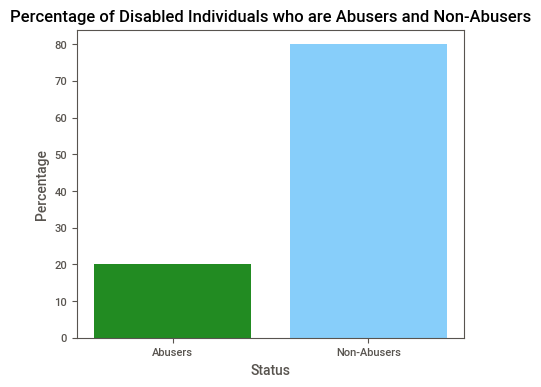

In [101]:
import matplotlib.pyplot as plt

# Filter DataFrame to select only disabled individuals
disabled_df = df[df['DISABILITY'] == 1]

# Calculate the total count of disabled individuals
total_disabled = len(disabled_df)

# Calculate the count of disabled individuals who are abusers
abusers_disabled = disabled_df[disabled_df['TARGET_ABUSER'] == 1].shape[0]

# Calculate the count of disabled individuals who are non-abusers
non_abusers_disabled = total_disabled - abusers_disabled

# Calculate the percentage of disabled individuals who are abusers
percentage_abusers_disabled = (abusers_disabled / total_disabled) * 100

# Calculate the percentage of disabled individuals who are non-abusers
percentage_non_abusers_disabled = (non_abusers_disabled / total_disabled) * 100

# Create a bar chart
labels = ['Abusers', 'Non-Abusers']
percentages = [percentage_abusers_disabled, percentage_non_abusers_disabled]
colors = ['forestgreen', 'lightskyblue']
plt.figure(figsize=(5, 4))
plt.bar(labels, percentages, color=colors)
plt.title('Percentage of Disabled Individuals who are Abusers and Non-Abusers')
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.show()


In [54]:
# Create a new column to indicate the specific disability each person has
df_abusers1['SPECIFIC_DISABILITY'] = ''

# Assign specific disabilities based on conditions
df_abusers1.loc[df_abusers1['BLIND'] == 1, 'SPECIFIC_DISABILITY'] += 'Blind, '
df_abusers1.loc[df_abusers1['DEAF'] == 1, 'SPECIFIC_DISABILITY'] += 'Deaf, '
df_abusers1.loc[df_abusers1['DECIDE'] == 1, 'SPECIFIC_DISABILITY'] += 'Decision Making, '
df_abusers1.loc[df_abusers1['DIFFWALK'] == 1, 'SPECIFIC_DISABILITY'] += 'Difficulty Walking, '
df_abusers1.loc[df_abusers1['DIFFDRES'] == 1, 'SPECIFIC_DISABILITY'] += 'Difficulty Dressing, '
df_abusers1.loc[df_abusers1['DIFFALON'] == 1, 'SPECIFIC_DISABILITY'] += 'Difficulty Alone, '


<ipython-input-54-1c101343b89e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abusers1['SPECIFIC_DISABILITY'] = ''


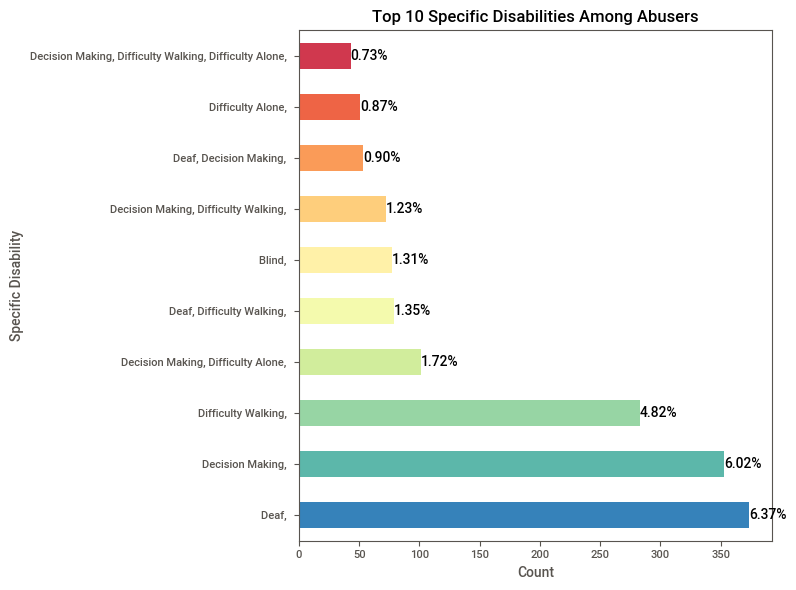

In [55]:
# Get the value counts of specific disabilities excluding the first row
specific_disability_counts = df_abusers1['SPECIFIC_DISABILITY'].value_counts().iloc[1:11]  # Exclude the first row

# Calculate total number of abusers with specific disabilities
total_abusers = len(df_abusers1)

# Set color palette
colors = sns.color_palette("Spectral", len(specific_disability_counts))
# Reverse the palette
colors.reverse()

# Plot the top 10 specific disabilities excluding the first row
plt.figure(figsize=(8, 6))
specific_disability_counts.plot(kind='barh' , color=colors)  # Using a fun palette
plt.title('Top 10 Specific Disabilities Among Abusers')
plt.xlabel('Count')
plt.ylabel('Specific Disability')

# Display percentages on top of each bar
for index, value in enumerate(specific_disability_counts):
    percentage = (value / total_abusers) * 100
    plt.text(value, index, f'{percentage:.2f}%', va='center')

plt.tight_layout()
plt.show()


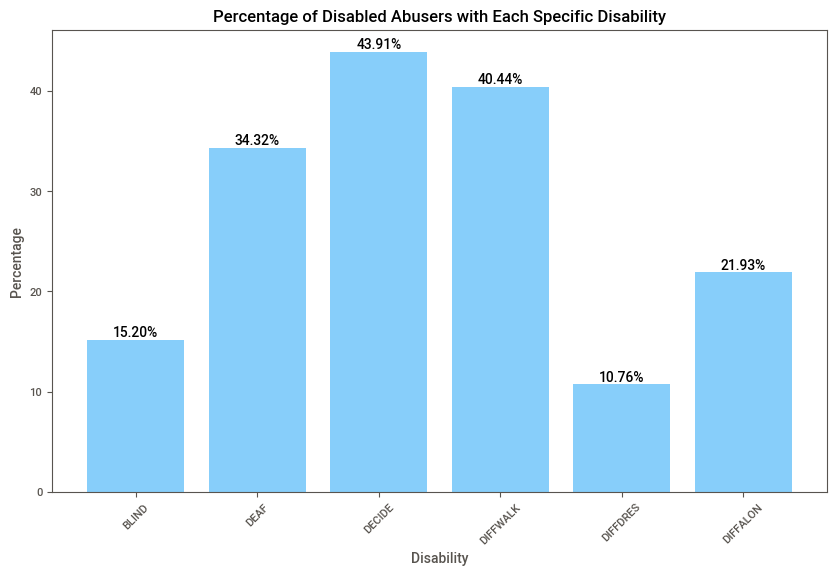

In [56]:
import matplotlib.pyplot as plt

# Filter DataFrame to select only disabled abusers
disabled_abusers_df = df[(df['DISABILITY'] == 1) & (df['TARGET_ABUSER'] == 1)]

# Calculate the total count of disabled abusers
total_disabled_abusers = len(disabled_abusers_df)

# Define the list of disabilities
disabilities = ['BLIND', 'DEAF', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON']

# Initialize a dictionary to store the counts of each disability among disabled abusers
disability_counts = {}

# Set color palette
colors1 = sns.color_palette("Spectral", len(specific_disability_counts))
# Reverse the palette
colors1.reverse()

# Calculate the count and percentage of each disability among disabled abusers
for disability in disabilities:
    count = disabled_abusers_df[disabled_abusers_df[disability] == 1].shape[0]
    percentage = (count / total_disabled_abusers) * 100
    disability_counts[disability] = percentage

# Create a bar chart with percentage values displayed on top of each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(disability_counts.keys(), disability_counts.values(), color="lightskyblue")

# Add percentage values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.title('Percentage of Disabled Abusers with Each Specific Disability')
plt.xlabel('Disability')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


7. Some random distributions

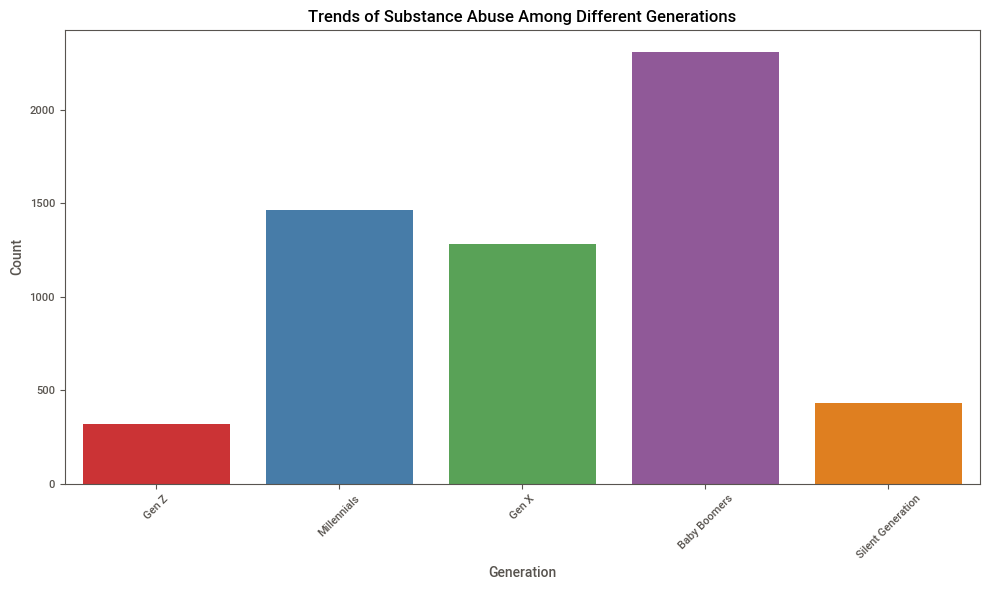

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the age ranges for each generation
generation_ranges = {
    'Gen Z': (18, 24),
    'Millennials': (25, 40),
    'Gen X': (41, 56),
    'Baby Boomers': (57, 75),
    'Silent Generation': (76, 100)  # Assumed maximum age
}

# Create a function to map numerical values to age ranges
def map_age_group(age_group):
    age_groups = {
        1: (18, 24),
        2: (25, 29),
        3: (30, 34),
        4: (35, 39),
        5: (40, 44),
        6: (45, 49),
        7: (50, 54),
        8: (55, 59),
        9: (60, 64),
        10: (65, 69),
        11: (70, 74),
        12: (75, 79),
        13: (80, 100)  # Assumed maximum age
    }
    return age_groups.get(age_group, (None, None))

# Create a new column 'Generation' based on the age groups
def assign_generation(age_group):
    age_range = map_age_group(age_group)
    for generation, (start, end) in generation_ranges.items():
        if age_range[0] and age_range[1] and start <= age_range[0] <= end:
            return generation
    return 'Unknown'

df['_GENERATION'] = df['_AGEG5YR'].apply(assign_generation)

# Filter the dataframe for cases where substance abuse is true
substance_abuse_df = df[df['TARGET_ABUSER'] == 1]

# Plot the trends of substance abuse among different generations
plt.figure(figsize=(10, 6))
sns.countplot(x='_GENERATION', data=substance_abuse_df, palette='Set1', order=generation_ranges.keys())
plt.title('Trends of Substance Abuse Among Different Generations')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


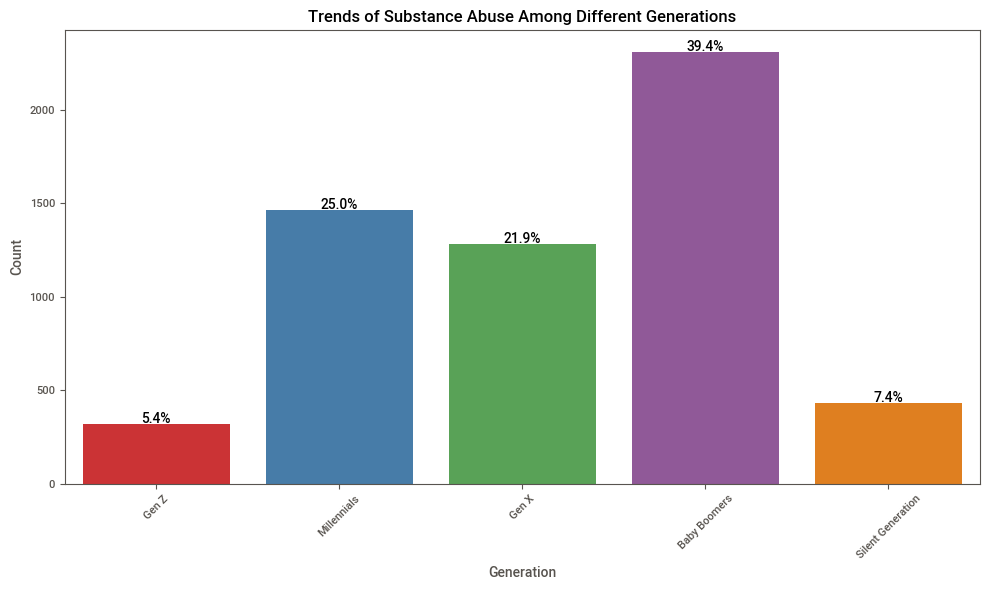

In [58]:
# Plot the trends of substance abuse among different generations
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='_GENERATION', data=substance_abuse_df, palette='Set1', order=generation_ranges.keys())
plt.title('Trends of Substance Abuse Among Different Generations')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
total = len(substance_abuse_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height / total:.1%}', ha='center')

plt.tight_layout()
plt.show()


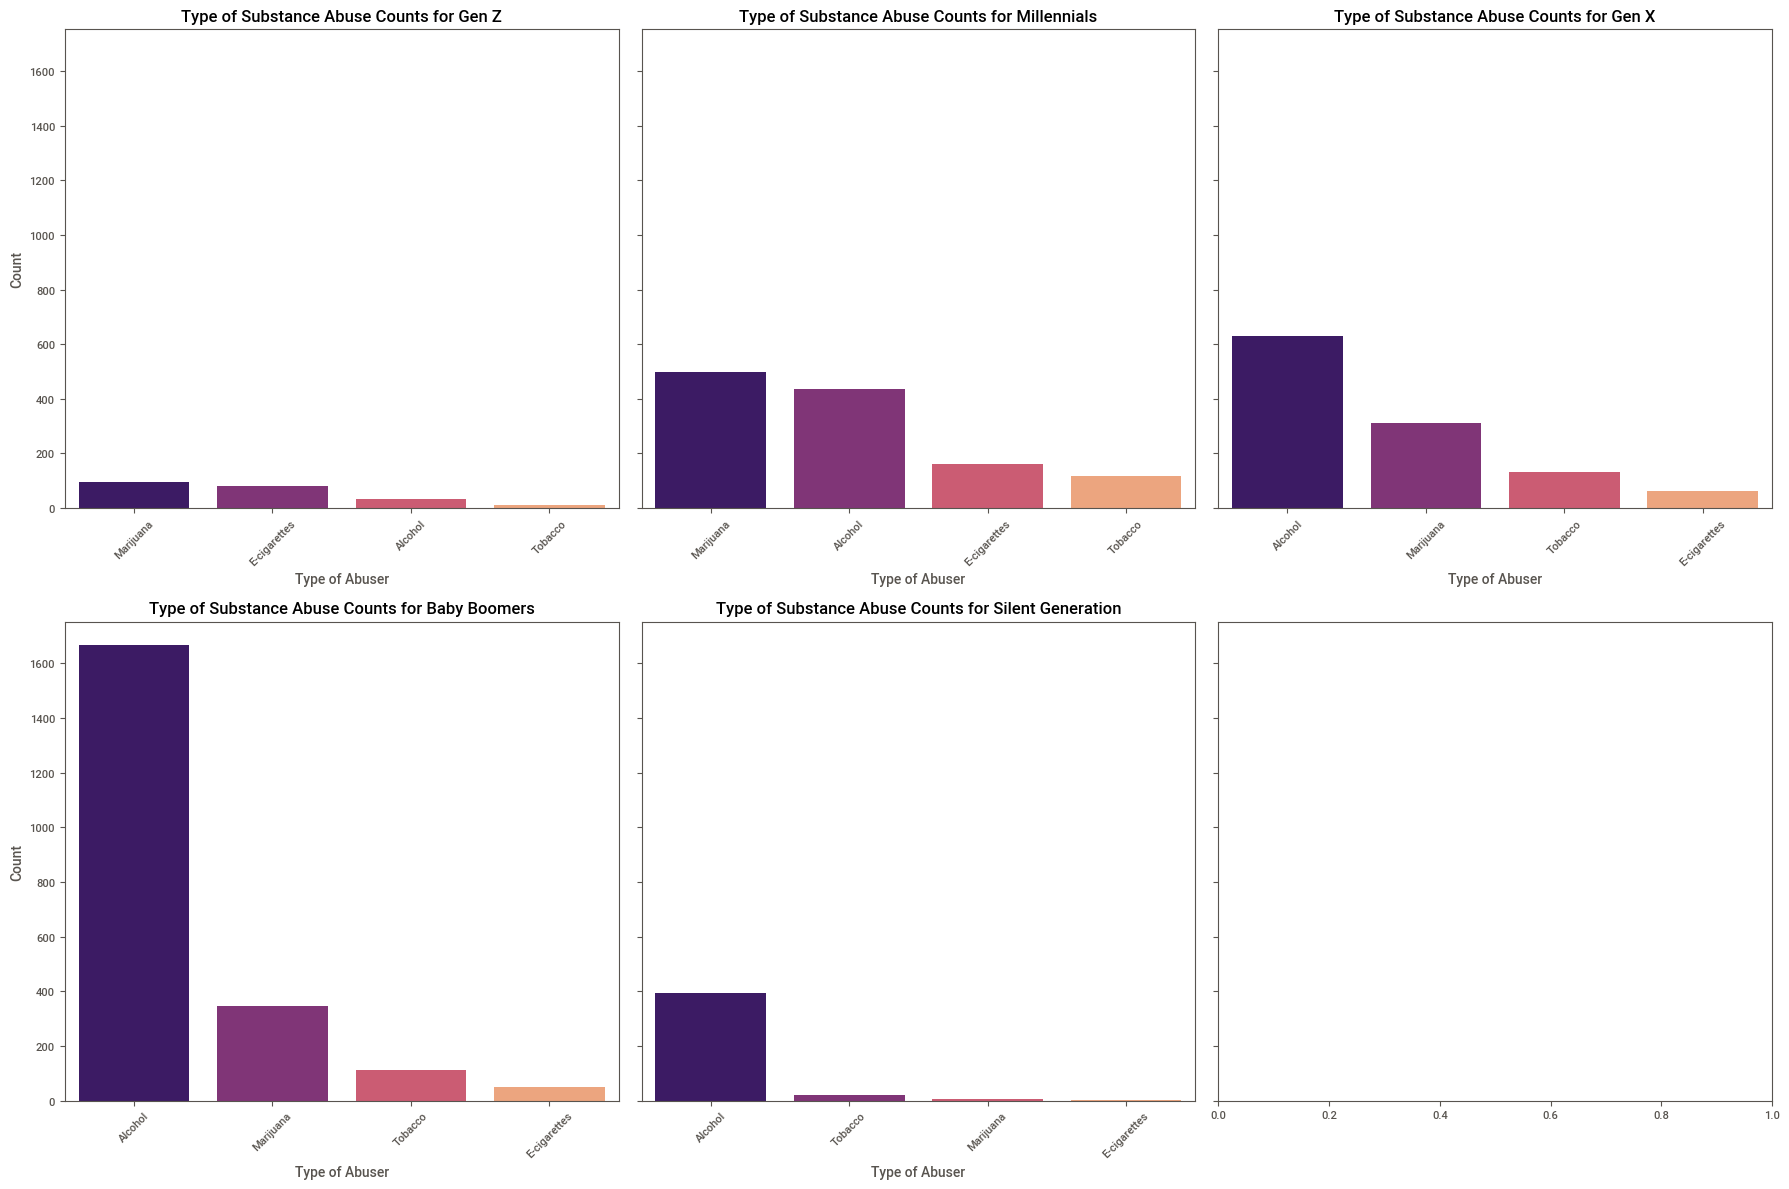

In [59]:
# Create a function to plot the top abused substance for a given generation
def plot_top_abused_substance(generation_name, generation_df, ax):
    # Get the value counts of TYPE_ABUSER for the generation
    type_abuser_counts = generation_df['TYPE_ABUSER'].value_counts()

    # Filter for counts 2, 3, 4, and 5
    filtered_counts = type_abuser_counts[type_abuser_counts.index.isin([2, 3, 4, 5])]

    # Create a dictionary to map counts to labels
    count_labels = {2: 'Tobacco', 3: 'Marijuana', 4: 'E-cigarettes', 5: 'Alcohol'}

    # Replace index labels with corresponding labels
    filtered_counts.index = filtered_counts.index.map(count_labels)

    # Plot the graph
    sns.barplot(x=filtered_counts.index, y=filtered_counts.values, palette='magma', ax=ax)
    ax.set_title(f'Type of Substance Abuse Counts for {generation_name}')
    ax.set_xlabel('Type of Abuser')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Define the generations
generations = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', 'Silent Generation']

# Create subplots for each generation
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=True)

# Iterate over each generation and plot the top abused substance
for i, generation in enumerate(generations):
    generation_df = df[df['_GENERATION'] == generation]
    ax = axes[i // 3, i % 3]  # Calculate subplot position
    plot_top_abused_substance(generation, generation_df, ax)

plt.tight_layout()
plt.show()

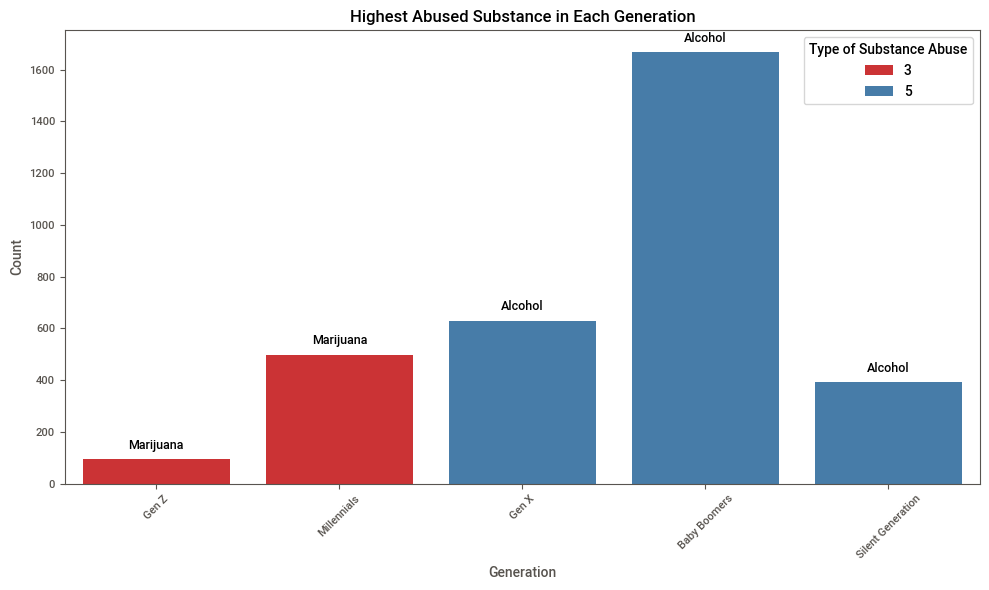

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the generations
generations = ['Gen Z', 'Millennials', 'Gen X', 'Baby Boomers', 'Silent Generation']

# Initialize lists to store the highest abused substance and its count for each generation
top_substances = []
top_counts = []

# Iterate over each generation and find the top abused substance
for generation in generations:
    generation_df = df[df['_GENERATION'] == generation]
    type_abuser_counts = generation_df['TYPE_ABUSER'].value_counts()
    filtered_counts = type_abuser_counts[type_abuser_counts.index.isin([2, 3, 4, 5])]
    if not filtered_counts.empty:
        top_substance = filtered_counts.idxmax()
        top_count = filtered_counts.max()
        top_substances.append(top_substance)
        top_counts.append(top_count)
    else:
        top_substances.append(None)
        top_counts.append(None)

# Plot the graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=generations, y=top_counts, hue=top_substances, palette='Set1')
plt.title('Highest Abused Substance in Each Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type of Substance Abuse')

# Annotate the bars with labels
for i, p in enumerate(ax.patches):
    if i < len(generations):  # Ensure index is within the range of generations
        generation = generations[i]
        top_substance = top_substances[i]
        if top_substance == 3:
            label = 'Marijuana'
        elif top_substance == 5:
            label = 'Alcohol'
        else:
            label = None
        if label:
            ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()


In [61]:
#Write the file to the required folder
df.to_excel("/content/drive/MyDrive/Capstone_Project/Backup/eda_sa_2021_2022.xlsx", index=False, header = True)